<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Home Prices in Banglore</h1>

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.1 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 61.1/61.1 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------------------------  337.9/341.8 kB 10.6 M

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**For each feature engineering step we will save a new dataframe so we can access it and make changes faster.**

In [5]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
real_cols = [col for col in df.columns if col not in ['price']]
cols_unique_values = {}

for col in real_cols:
    cols_unique_values[col] = df[col].unique()
    
cols_unique_values 

{'area_type': array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
        'Carpet  Area'], dtype=object),
 'availability': array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
        '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
        '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
        '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
        '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
        '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
        '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
        'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
        '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
        '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
        '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
        '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
        '15-Oct', '15-Dec', '16-Oct', '2

#  Feature Engineering

**Since one of ML Estimators i will train is LinearRegression which is sensitive to outliers, i must handle them in order to have a better model performance.**

**We must treat outliers on the entire dataset because if we split before outlier treatment, we may end up having some other outliers based on the randomness of split which makes no sense.**

**Before handling outliers we must do some preprocessing on data like handling missing values, encoding categorical fetaures etc because we may face different error because of missing values, categorical features etc. This preprocessing will be done on entire data because we want to handle outliers considering the entire dataset.**

### Step 1 Dropping columns that are not relevant for prediction.

In [8]:
for col in df.columns:
    print(col + ' : ')
    print(df[col].unique())
    print('Length : ' + str(len(df[col].unique())))
    print()

area_type : 
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
Length : 4

availability : 
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
Length : 81

location : 
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshanka

**Availability shows the date from when the house is available which based on domain knowledge is not going to help our model for prediction.**

In [9]:
def drop_col(dataset, colnames):
    dataset.drop(colnames, axis=1, inplace=True)
    return dataset

In [10]:
df = drop_col(df, ['availability'])

In [11]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Step 2  Handling Missing Values

In [22]:
def check_for_missing_values(dataset):
    
    if dataset.isna().sum().any():

        df_nan_values = pd.DataFrame()

        for col in dataset.columns:
            nr_nan_values_percentage = dataset[col].isna().mean()
            nr_nan_values = dataset[col].isna().sum()

            if nr_nan_values > 0:
                row = {'Feature' : col, 
                       'Percentage Nan Values' : nr_nan_values_percentage, 
                       'Amount Nan Values' : nr_nan_values}
                df_nan_values = df_nan_values.append(row, ignore_index=True)


        df_nan_values.to_csv('mycsv.csv', index=False)
        
        return True
    
    else:
        return False
    

In [23]:
if check_for_missing_values(df):
    print('There are missing values')
else:
    print('There are no missing values')

AttributeError: 'DataFrame' object has no attribute 'append'

In [18]:
pd.read_csv('mycsv.csv')

,Amount Nan Values,Feature,Percentage Nan Values
0,1.0,location,0.000075
1,16.0,size,0.001201
2,5502.0,society,0.413063
3,73.0,bath,0.005480
4,609.0,balcony,0.045721


In [24]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
print(len(features_with_na))
print(features_with_na)
print(len(df.columns))

5
['location', 'size', 'society', 'bath', 'balcony']
8


In [25]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

location 0.0001  % missing values
size 0.0012  % missing values
society 0.4131  % missing values
bath 0.0055  % missing values
balcony 0.0457  % missing values


In [26]:
df.isna().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

**Since features location, size, bath, balcony have very few missing values, dropping them wont affect the model performance at all, because we will lose only very few information. So i am going to drop rows with those missing values.**

In [27]:
df = df.dropna(axis=0, how='any', subset=['location', 'size', 'bath', 'balcony'])

In [28]:
# check that missing values are dropped
df.isna().sum()

area_type        0
location         0
size             0
society       5214
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

**Society has huge amount of missing values (around 40%). Its not good idea to drop all rows with those missing values since we may lose too much information from data. Because this feature has many categories i will replace all nan values with string 'Missing' which may be considered as new category.**

In [29]:
# total nr of categories in society
print(len(df['society'].unique()))

2593


In [30]:
print(df['society'].isna().sum() / len(df))

0.410228166797797


In [31]:
def impute_nan(dataset, features):
    for feature in features:
        dataset[feature] = dataset[feature].fillna('Missing')
        
    return dataset

In [32]:
df = impute_nan(df, ['society'])

In [33]:
# check that there are no missing values in society feature
df.isna().sum()

area_type     0
location      0
size          0
society       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### Step 3  Encoding categorical features

**Society feature is a nominal categorical feature.It has many categories so we can not apply one-hot encoding because in that case we would highly increase the nr of features. Instead i will apply a dimensionality reduction technique which redues the nr of categories in society feature and consider only the top 20 most frequent categories. All the other categories will be replaced with 'other'. After reducing the nr of categories i will apply one-hot encoding.**

In [34]:
print(len(df['society'].unique()))
print(df['society'].unique())

2593
['Coomee ' 'Theanmp' 'Missing' ... 'SJovest' 'ThhtsV ' 'RSntsAp']


In [35]:
df['society'].value_counts(ascending=False)[:20]

society
Missing    5214
GrrvaGr      80
PrarePa      71
Sryalan      59
Prtates      58
GMown E      56
Bhmesy       50
Prityel      50
PrityTr      49
Prarkun      49
Prtanha      49
Dhalsh       47
SNity S      40
Soresea      39
IBityin      39
Soitya       36
Bhe 2ko      35
Adeatlm      35
Rosha I      34
SunceEs      34
Name: count, dtype: int64

In [36]:
society_stats = df['society'].value_counts(ascending=False)
society_stats

society
Missing    5214
GrrvaGr      80
PrarePa      71
Sryalan      59
Prtates      58
           ... 
Shine S       1
Pelle P       1
RRersow       1
RKhipwn       1
RSntsAp       1
Name: count, Length: 2593, dtype: int64

In [37]:
for x in society_stats.unique():
    print(f'Frequency {x} - Nr of categories {len(society_stats[society_stats == x])}')

Frequency 5214 - Nr of categories 1
Frequency 80 - Nr of categories 1
Frequency 71 - Nr of categories 1
Frequency 59 - Nr of categories 1
Frequency 58 - Nr of categories 1
Frequency 56 - Nr of categories 1
Frequency 50 - Nr of categories 2
Frequency 49 - Nr of categories 3
Frequency 47 - Nr of categories 1
Frequency 40 - Nr of categories 1
Frequency 39 - Nr of categories 2
Frequency 36 - Nr of categories 1
Frequency 35 - Nr of categories 2
Frequency 34 - Nr of categories 2
Frequency 31 - Nr of categories 1
Frequency 30 - Nr of categories 1
Frequency 29 - Nr of categories 1
Frequency 28 - Nr of categories 1
Frequency 27 - Nr of categories 3
Frequency 26 - Nr of categories 3
Frequency 25 - Nr of categories 1
Frequency 24 - Nr of categories 2
Frequency 23 - Nr of categories 3
Frequency 22 - Nr of categories 4
Frequency 21 - Nr of categories 6
Frequency 20 - Nr of categories 4
Frequency 19 - Nr of categories 3
Frequency 17 - Nr of categories 5
Frequency 16 - Nr of categories 4
Frequency 15

In [38]:
def reduce_categories(dataset, feature, top_k):
    
    top_k_frequencies = dataset[feature].value_counts(ascending=False)[:top_k] 
    top_k_categories = top_k_frequencies.index
    total_nr_categories = len(dataset[feature].unique())
    nr_categories_other = len([cat for cat in dataset[feature].unique() if cat not in top_k_categories])
    print(f"Nr of categories (low frequency categories) labeled with 'other' : {nr_categories_other} out of total {total_nr_categories}")
    print(f"Nr of categories not labeled with 'other' : {top_k}")
    dataset[feature] = dataset[feature].apply(lambda x: x if x in top_k_categories else 'other')

    #dataset = pd.get_dummies(dataset, columns=[feature], drop_first=True)
            
    return dataset

In [39]:
df = reduce_categories(df, 'society', 20)
df = pd.get_dummies(df, columns=['society'], drop_first=True)

Nr of categories (low frequency categories) labeled with 'other' : 2573 out of total 2593
Nr of categories not labeled with 'other' : 20


In [40]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price', 'society_Bhe 2ko', 'society_Bhmesy ', 'society_Dhalsh ',
       'society_GMown E', 'society_GrrvaGr', 'society_IBityin',
       'society_Missing', 'society_PrarePa', 'society_Prarkun',
       'society_PrityTr', 'society_Prityel', 'society_Prtanha',
       'society_Prtates', 'society_Rosha I', 'society_SNity S',
       'society_Soitya ', 'society_Soresea', 'society_Sryalan',
       'society_SunceEs', 'society_other'],
      dtype='object')

**area_type feature is a nominal categorical feature. It does not contain many categories so i will then use one-hot encoding te encode this feature into numerical.**

In [41]:
print(len(df['area_type'].unique()))
print(df['area_type'].unique())

4
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [42]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8481
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: count, dtype: int64

In [43]:
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)

In [44]:
df.head()

,location,size,total_sqft,bath,balcony,price,society_Bhe 2ko,society_Bhmesy,society_Dhalsh,society_GMown E,...,society_Rosha I,society_SNity S,society_Soitya,society_Soresea,society_Sryalan,society_SunceEs,society_other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [45]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'society_Bhe 2ko', 'society_Bhmesy ', 'society_Dhalsh ',
       'society_GMown E', 'society_GrrvaGr', 'society_IBityin',
       'society_Missing', 'society_PrarePa', 'society_Prarkun',
       'society_PrityTr', 'society_Prityel', 'society_Prtanha',
       'society_Prtates', 'society_Rosha I', 'society_SNity S',
       'society_Soitya ', 'society_Soresea', 'society_Sryalan',
       'society_SunceEs', 'society_other', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area'],
      dtype='object')

**Size feature is a ordinal categorical feature. We will convert to numerical by taking only the number of bedrooms since it already contains it but associated with the string 'BHK' or 'Bedroom'.** <br>

In [46]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [47]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop('size', axis=1, inplace=True)

In [48]:
df['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

**Total sqft Feature must be of datatype float. It has object datatype and different kind of values so we must handle them**

In [49]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [50]:
df['total_sqft'].dtypes

dtype('O')

* Object datatype means that this feature can have different  types of values like float, int, string. We must  ensure that all values are float numbers.

* We try to convert each value of total_sqft column to float. If it is not a float number it will throw an exception and return false, otherwise if it is a float number it will return True.

In [51]:
def is_float(x):
    try:
        float(x) 
    except:
        return False
    return True

In [52]:
# get all the rows where total_sqft is not float since we are interested to convert those values to float.

new_df1 = df[~df['total_sqft'].apply(is_float)]
new_df1.head(10)

,location,total_sqft,bath,balcony,price,society_Bhe 2ko,society_Bhmesy,society_Dhalsh,society_GMown E,society_GrrvaGr,...,society_SNity S,society_Soitya,society_Soresea,society_Sryalan,society_SunceEs,society_other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2


In [53]:
new_df1['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as '132Sq. Yards', '716 Sq. Meter', '6Acres', '24Guntha', '3Cents'. Features requires all values to be in square foot (sqft). We can convert to square foot all this units. In test set we see a new value '1Grounds'. So we have values in format '132Sq. Yards', '716Sq. Meter', '6Acres', '24Guntha', '3Cents', '1Grounds'.****

**1 square foot = 0,09290304 square meter**<br>
**1 square foot = 0,11111111 square yards**<br>
**1 square foot = 0,00002296 Acres**<br>
**1 square foot = 0.0023     Cents**<br>
**1 square foot = 0.00000003587 Guntha**<br>
**1 square foot = 0.00041666666666667 Grounds**<br>

In [54]:
int('132   Sq. Yards'.split('Sq')[0])

132

In [55]:
def convert_sqft_to_num(x):

    try:
        float_x = float(x) # case where x is of type '234.3' which means we can directly covert to float
        return float_x
        
    except:
        
        tokens = x.split('-') 
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))/2  # tokens are in string format so we must convert to float to calculate mean
         # else(cases where we dont have a range min-max the length of tokens = 1 since those values do not contain '-')
        tokens = x.split(' ') 
        if len(tokens) == 2: # cases '132Sq. Yards' or '716Sq. Meter'
            if tokens[1] == 'Yards':  # case '132Sq. Yards'  
                yards = float(tokens[0][:-3])
                sqft = yards / 0.11111111
                return sqft
            elif tokens[1] == 'Meter':  # case '716Sq. Meter'
                meters = float(tokens[0][:-3])
                sqft = meters / 0.09290304
                return sqft
    
        else:  # cases '6Acres', '24Guntha', '3Cents', '1Grounds'
            if 'Acres' in x:
                tokens = x.split('Acres')
                acres = float(tokens[0])
                sqft = acres / 0.00002296
                return sqft
        
            elif 'Guntha' in x:
                tokens = x.split('Guntha')
                guntha = float(tokens[0])
                sqft = guntha / 0.00000003587
                return sqft
        
            elif 'Cents' in x:
                tokens = x.split('Cents')
                cents = float(tokens[0])
                sqft = cents / 0.0023
                return sqft
        
            elif 'Grounds' in x:
                tokens = x.split('Grounds')
                grounds = float(tokens[0])
                sqft = grounds / 0.00041666666666667
                return sqft
    
    
        return None 

In [56]:
def convert_sqft_to_num(x):

    try:
        float_x = float(x) # case where x is of type '234.3' which means we can directly covert to float
        return float_x
        
    except:
        
        tokens = x.split('-') 
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))/2  # tokens are in string format so we must convert to float to calculate mean
         # else(cases where we dont have a range min-max the length of tokens = 1 since those values do not contain '-')
        tokens = x.split(' ') 
        if len(tokens) == 2: # cases '132Sq. Yards' or '716Sq. Meter'
            if tokens[1] == 'Yards':  # case '132Sq. Yards'  
                yards = float(tokens[0][:-3])
                sqft = yards / 0.11111111
                return sqft
            elif tokens[1] == 'Meter':  # case '716Sq. Meter'
                meters = float(tokens[0][:-3])
                sqft = meters / 0.09290304
                return sqft
    
        else:  # cases '6Acres', '24Guntha', '3Cents', '1Grounds'
            if 'Acres' in x:
                tokens = x.split('Acres')
                acres = float(tokens[0])
                sqft = acres / 0.00002296
                return sqft
        
            elif 'Guntha' in x:
                tokens = x.split('Guntha')
                guntha = float(tokens[0])
                sqft = guntha / 0.00000003587
                return sqft
        
            elif 'Cents' in x:
                tokens = x.split('Cents')
                cents = float(tokens[0])
                sqft = cents / 0.0023
                return sqft
        
            elif 'Grounds' in x:
                tokens = x.split('Grounds')
                grounds = float(tokens[0])
                sqft = grounds / 0.00041666666666667
                return sqft
    
    
        return None 
        # None means Nan value (as we have seen there we have included all the cases but just to make sure we return nan value of none of the above conditions is satisfied)

In [57]:
# create copy of dataframe before making changes in order to check that results are correct.
# df is the dataframe before making changes, df1 is the dataframe after making changes

df1 = df.copy()

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)

**Check for each case by taking one single example that we have converted the values in proper way.**

**Check for Square Yards.**

In [58]:
print([(value, index) for value, index in zip(df['total_sqft'], df['total_sqft'].index) if 'Yards' in value][0])

print(df1['total_sqft'].loc[7248])

# 1 square foot = 0,11111111 square yards
print(132 / 0.11111111)

# we got same results

('1574Sq. Yards', 1821)
1188.00001188
1188.00001188


**Check for Square Meter**

In [59]:
print([(value, index) for value, index in zip(df['total_sqft'], df['total_sqft'].index) if 'Meter' in value][0])

print(df1['total_sqft'].loc[10491])

# 1 square foot = 0,09290304 square meter
print(86.72 / 0.09290304)

# we got same results

('34.46Sq. Meter', 410)
933.4463113370671
933.4463113370671


**Check for Acres**

In [60]:
print([(value, index) for value, index in zip(df['total_sqft'], df['total_sqft'].index) if 'Acres' in value][0])

print(df1['total_sqft'].loc[11615])

# 1 square foot = 0,00002296 Acres
print(6 / 0.00002296)

# we got same results

('5.31Acres', 1019)
261324.0418118467
261324.0418118467


**Check for Cents.**

In [61]:
print([(value, index) for value, index in zip(df['total_sqft'], df['total_sqft'].index) if 'Cents' in value][0])

print(df1['total_sqft'].loc[5453])

# 1 square foot = 0.0023  Cents
print(3 / 0.0023)

# we got same results

('3Cents', 5453)
1304.3478260869565
1304.3478260869565


**Check for Guntha.**

In [62]:
print([(value, index) for value, index in zip(df['total_sqft'], df['total_sqft'].index) if 'Guntha' in value][0])

print(df1['total_sqft'].loc[6552])

# 1 square foot = 0.00000003587 Guntha
print(24 / 0.00000003587)

# we got same results

('24Guntha', 6552)
669082798.9963758
669082798.9963758


**Check for Grounds. <br>

In [63]:
print([(value, index) for value, index in zip(df['total_sqft'], df['total_sqft'].index) if 'Grounds' in value][0])

print(df1['total_sqft'].loc[9423])

# 1 square foot = 0.00041666666666667 Grounds
print(1 / 0.00041666666666667)

# we got same results

('1Grounds', 9423)
2399.999999999981
2399.999999999981


**Location feature is a nominal categorical feature und it has many (1153) categories. So one hot encoding would not be a good idea since it would increase drastically the number of features. I am going to apply a dimensionality reduction technique to encode this feature into numerical.**

In [64]:
print(len(df1['location'].unique()))
print(df1['location'].unique())

1265
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [65]:
# Removing spaces in front and in the end of categories using strip function

df1.location = df1.location.apply(lambda x: x.strip())

In [66]:
location_stats = df1['location'].value_counts(ascending=False)
location_stats

location
Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: count, Length: 1254, dtype: int64

In [67]:
for x in location_stats.unique():
    print(f'Frequency {x} - Nr of categories {len(location_stats[location_stats == x])}')

Frequency 515 - Nr of categories 1
Frequency 372 - Nr of categories 1
Frequency 302 - Nr of categories 1
Frequency 261 - Nr of categories 1
Frequency 234 - Nr of categories 1
Frequency 206 - Nr of categories 1
Frequency 186 - Nr of categories 1
Frequency 173 - Nr of categories 1
Frequency 168 - Nr of categories 1
Frequency 164 - Nr of categories 1
Frequency 147 - Nr of categories 1
Frequency 144 - Nr of categories 1
Frequency 142 - Nr of categories 1
Frequency 135 - Nr of categories 1
Frequency 130 - Nr of categories 1
Frequency 99 - Nr of categories 1
Frequency 98 - Nr of categories 1
Frequency 91 - Nr of categories 1
Frequency 86 - Nr of categories 2
Frequency 85 - Nr of categories 1
Frequency 83 - Nr of categories 1
Frequency 81 - Nr of categories 1
Frequency 78 - Nr of categories 1
Frequency 77 - Nr of categories 1
Frequency 76 - Nr of categories 1
Frequency 74 - Nr of categories 1
Frequency 72 - Nr of categories 2
Frequency 71 - Nr of categories 2
Frequency 69 - Nr of categories 2

**We have so many categories with very low frequency. Any location having less than 20 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns.**

In [68]:
df1['location'].value_counts(ascending=False)[:20]

location
Whitefield                  515
Sarjapur  Road              372
Electronic City             302
Kanakpura Road              261
Thanisandra                 234
Yelahanka                   206
Uttarahalli                 186
Hebbal                      173
Raja Rajeshwari Nagar       168
Marathahalli                164
7th Phase JP Nagar          147
Bannerghatta Road           144
Hennur Road                 142
Haralur Road                135
Electronic City Phase II    130
Rajaji Nagar                 99
Chandapura                   98
Bellandur                    91
Hoodi                        86
Electronics City Phase 1     86
Name: count, dtype: int64

**Function encoding_categorical will select the top_k most frequent categories and will replace all the remaining categories (with low frequency) with string 'other' which can be considered as a new category.**

In [69]:
def reduce_categories(dataset, feature, top_k):
    
    top_k_frequencies = dataset[feature].value_counts(ascending=False)[:top_k] 
    top_k_categories = top_k_frequencies.index
    total_nr_categories = len(dataset[feature].unique())
    nr_categories_other = len([cat for cat in dataset[feature].unique() if cat not in top_k_categories])
    print(f"Nr of categories (low frequency categories) labeled with 'other' : {nr_categories_other} out of total {total_nr_categories}")
    print(f"Nr of categories not labeled with 'other' : {top_k}")
    dataset[feature] = dataset[feature].apply(lambda x: x if x in top_k_categories else 'other')

    # i will not directly perform one-hot encoding since i dont want to remove location columns because i need it to handle then outliers
    #dataset = pd.get_dummies(dataset, columns=[feature], drop_first=True)
            
    return dataset

In [70]:
df1 = reduce_categories(df1, 'location', 20)
location_onehot = pd.get_dummies(df1['location'], drop_first=True)
df1 = pd.concat([df1, location_onehot], axis=1)

Nr of categories (low frequency categories) labeled with 'other' : 1234 out of total 1254
Nr of categories not labeled with 'other' : 20


**I will set drop_first=True to remove one one-hot encoded feature in order to have a lower nr of features.**

**After replace low frequency categories with 'other' use one-hot-encoding since we now have fewer categories.**
**Since we use one-hot encoding we must remove location column but i will need for outlier treatment so afterwards i am going to remove it.**

In [71]:
df1.shape

(12710, 49)

### Step 4 Handling Outliers

**Now that we have cleaned our data we can use it to handle the outliers.**

**Add new feature called price per square feet because we need it to handle outliers**

In [72]:
df1['price_per_sqft'] = df1['price']*100000 / df1['total_sqft']

In [73]:
df_stats = df1['price_per_sqft'].describe()
df_stats

count    1.271000e+04
mean     6.874903e+03
std      2.261334e+04
min      1.604711e-02
25%      4.237918e+03
50%      5.370854e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

### A) Outlier Removal : remove all houses where sqft per 1 bedroom is less then 300 (using Business Logic)

**Business manager (who has expertise in real estate), told me that the minimal square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 total sqft apartment (less than 600) with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [74]:
# total_sqft / nr of bedrooms gives us the sqft per bedroom
# select all rows where 1 bedroom is less than 300 sqft (which is minimum threshold )
df1[df1.total_sqft / df1.bhk < 300].head()

,location,total_sqft,bath,balcony,price,society_Bhe 2ko,society_Bhmesy,society_Dhalsh,society_GMown E,society_GrrvaGr,...,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other,price_per_sqft
58,other,1407.0,4.0,1.0,150.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,10660.980810
68,other,1350.0,7.0,0.0,85.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,6296.296296
70,other,500.0,3.0,2.0,100.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,20000.000000
78,other,460.0,1.0,0.0,22.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,22535.211268


In [75]:
print(len(df1)) # total nr of houses
print(len(df1[df1.total_sqft / df1.bhk < 300])) # nr of houses with 1 bedroom less than 300 sqft (nr of outliers)

12710
659


In [76]:
df1[df1.total_sqft / df1.bhk < 300].head()

,location,total_sqft,bath,balcony,price,society_Bhe 2ko,society_Bhmesy,society_Dhalsh,society_GMown E,society_GrrvaGr,...,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other,price_per_sqft
58,other,1407.0,4.0,1.0,150.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,10660.980810
68,other,1350.0,7.0,0.0,85.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,6296.296296
70,other,500.0,3.0,2.0,100.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,20000.000000
78,other,460.0,1.0,0.0,22.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,22535.211268


In [77]:
print(len(df1)) # total nr of houses
print(len(df1[df1.total_sqft / df1.bhk < 300])) # nr of houses with 1 bedroom less than 300 sqft (nr of outliers)

12710
659


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are outliers. Lets remove all the rows (houses) where 1 bedroom is less than 300 sqft (select all rows where 1 bedroom is greater than 300 sqft**

In [78]:
print(df1.shape)

(12710, 50)


In [79]:
df1 = df1[~(df1.total_sqft / df1.bhk <300)]

In [80]:
print(df1.shape)

(12051, 50)


### B) Outlier Removal : remove all houses where price per sqft per location is greater than mean + 1 std and less than mean - 1 std.

In [81]:
df1['price'].describe()

count    12051.000000
mean       105.096935
std        134.143368
min          9.000000
25%         48.450000
50%         68.000000
75%        110.000000
max       2912.000000
Name: price, dtype: float64

In [82]:
df1['price_per_sqft'].describe()

count     12051.000000
mean       6196.839879
std        3987.066204
min           0.016047
25%        4193.953340
50%        5250.172771
75%        6823.336758
max      176470.588235
Name: price_per_sqft, dtype: float64

In [83]:
df1['price_per_sqft'].describe()

count     12051.000000
mean       6196.839879
std        3987.066204
min           0.016047
25%        4193.953340
50%        5250.172771
75%        6823.336758
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that in training set the min price per sqft is 0.016 whereas max is 176470. This shows a wide variation in property prices (in both training and test set). We should remove outliers per each location (not based on the entire dataset) since in each location we have different prices per sqft. We will remove all houses where price per sqft is greater than mean + 1 std and less than mean - 1 std.**

In [84]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # key is the name of the location, subdf is the dataframe of that location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [85]:
# shape of dataset before outlier removal
print(df1.shape)

(12051, 50)


In [86]:
df1 = remove_pps_outliers(df1)

In [87]:
# shape of dataset after outlier removal
print(df1.shape)

(10601, 50)


### C) Outlier Removal : remove all houses where total price of x+1 BHK is greater than prices of houses with x BHK for same total sqft.

**Let's check if for a given location, for houses with 2 BHK and 3BHK how does the total sqft and total sqft look like. (remember we visualize data for each location since for each location there are different house prices).**

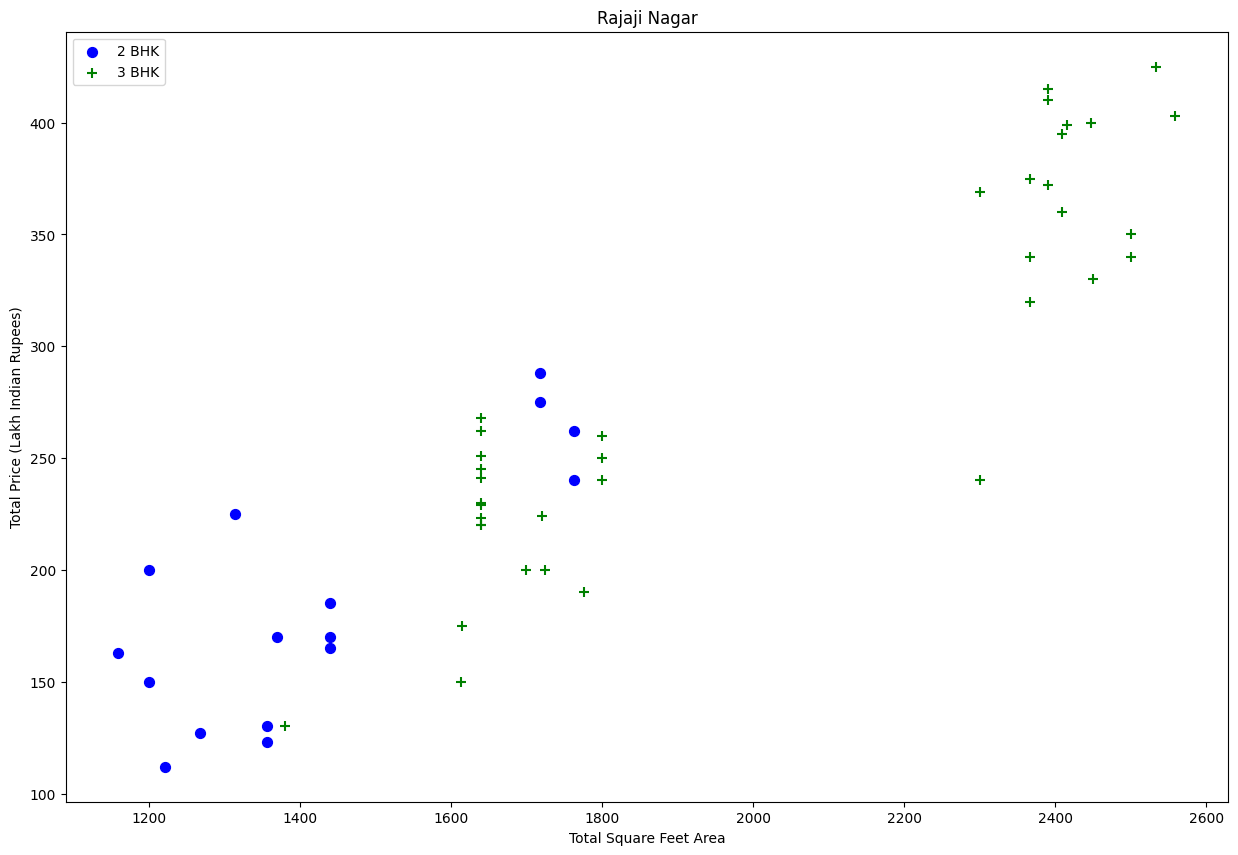

In [88]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Total Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df1, "Rajaji Nagar")

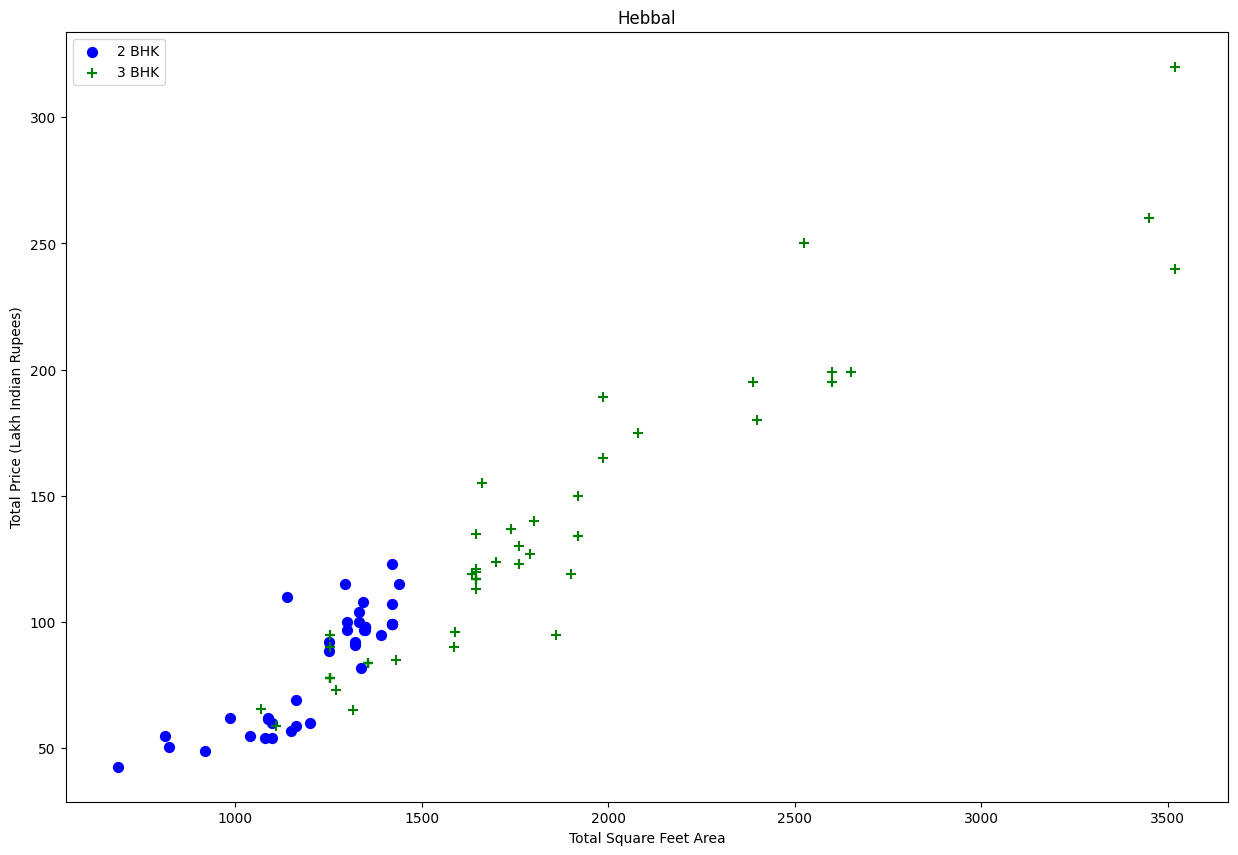

In [89]:
plot_scatter_chart(df1, "Hebbal")

**We see that for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). We must remove those outliers. What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [90]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [91]:
# shape of dataset before outlier removal
print(df1.shape)

(10601, 50)


In [92]:
df1 = remove_bhk_outliers(df1)

In [93]:
# shape of dataset after outliers removal
print(df1.shape)

(5913, 50)


**Plot same scatter chart again after Outliers Removal to visualize price_per_sqft for 2 BHK and 3 BHK properties**

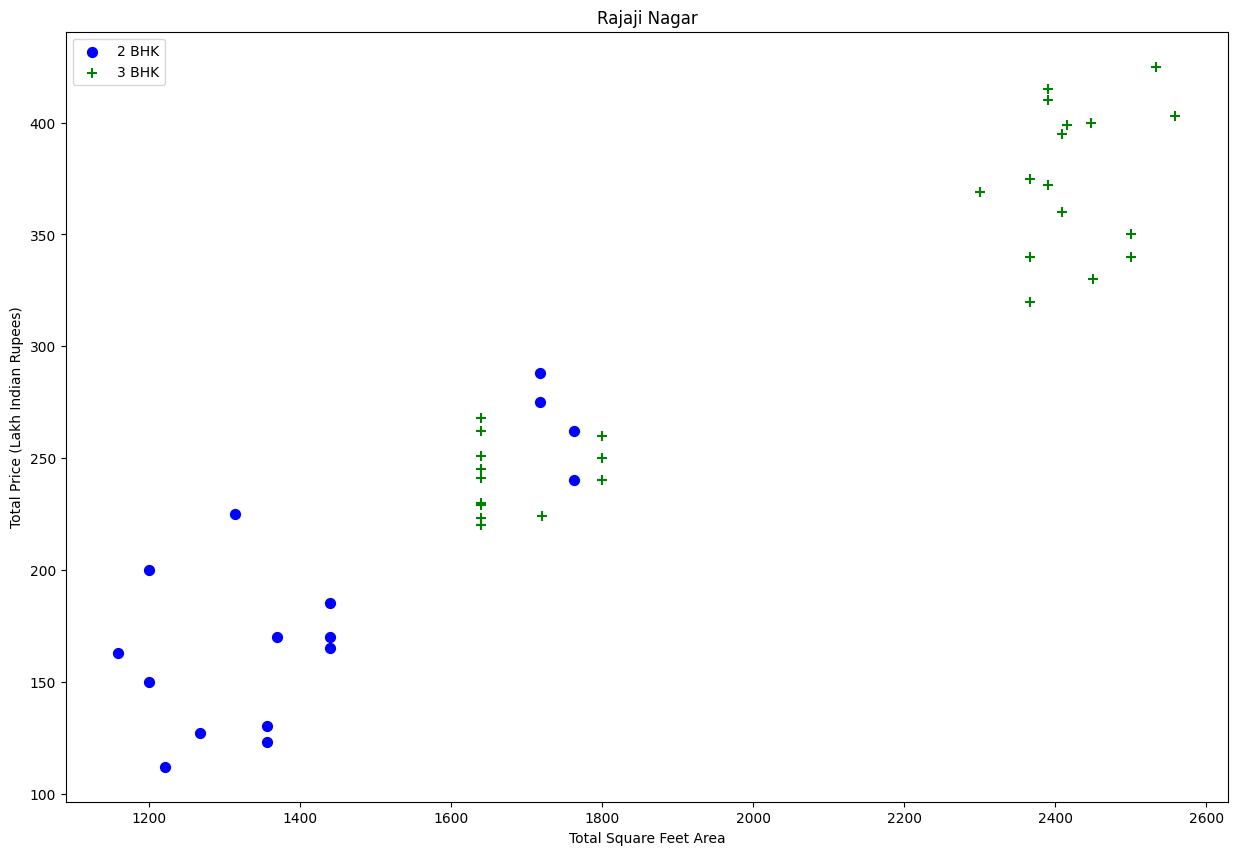

In [94]:
plot_scatter_chart(df1, "Rajaji Nagar")

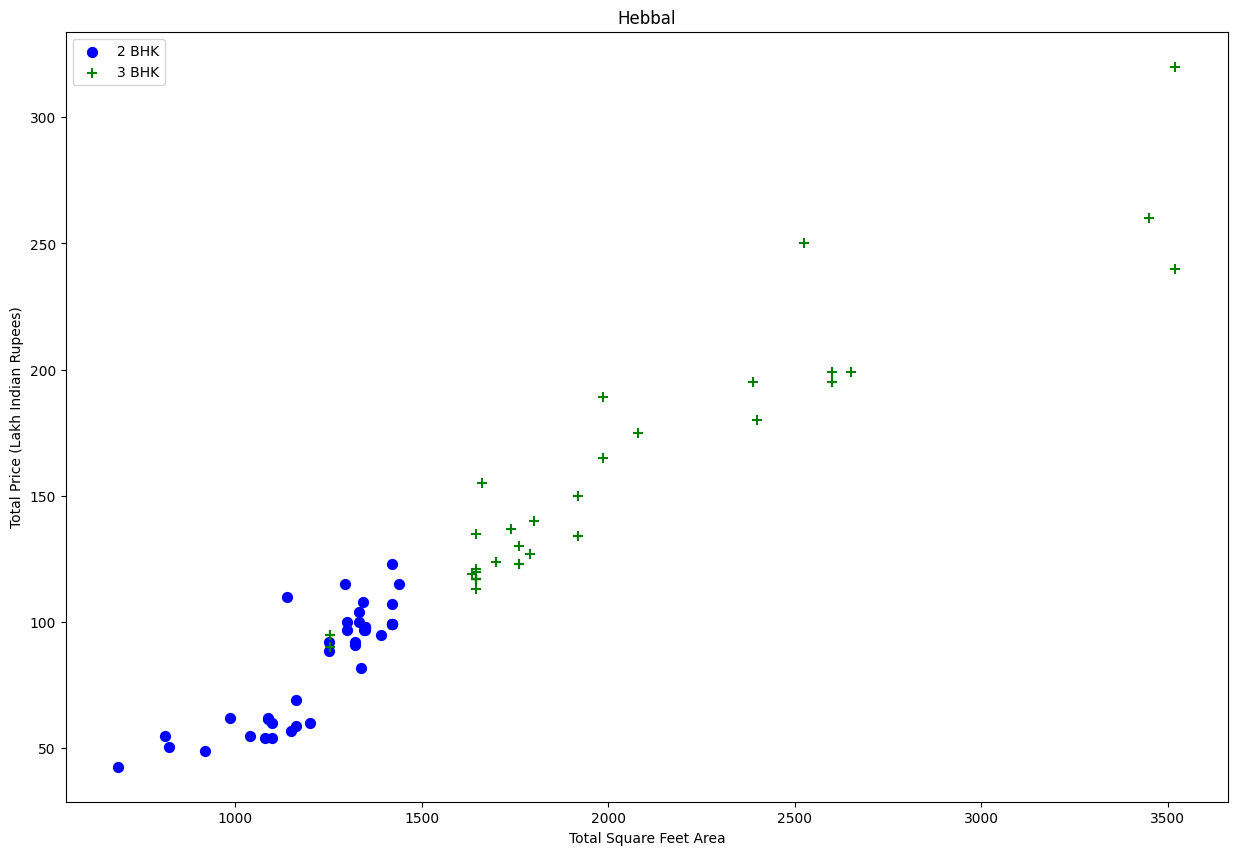

In [95]:
plot_scatter_chart(df1, "Hebbal")

Text(0, 0.5, 'Count')

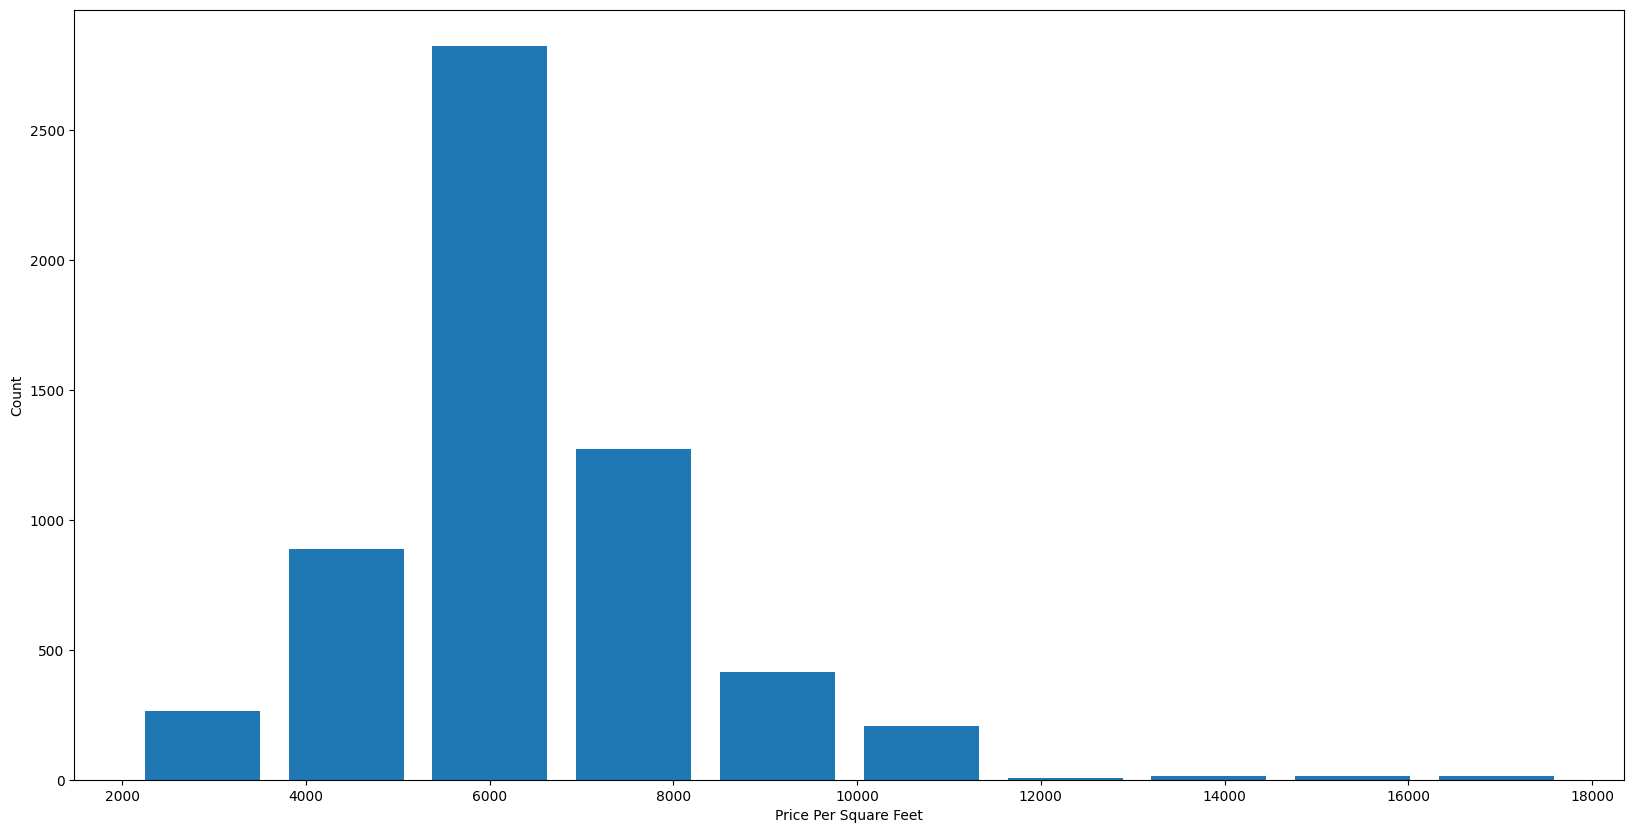

In [96]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [97]:
df1.shape

(5913, 50)

### D) Outlier Removal : remove all houses where nr of bathrooms is greater than 2 + nr of bedroom</h2>

In [98]:
# show all different nr of bathrooms
df1.bath.unique()

array([ 2.,  3.,  4.,  1.,  5.,  6.,  9.,  7.,  8., 13.])

Text(0, 0.5, 'Count')

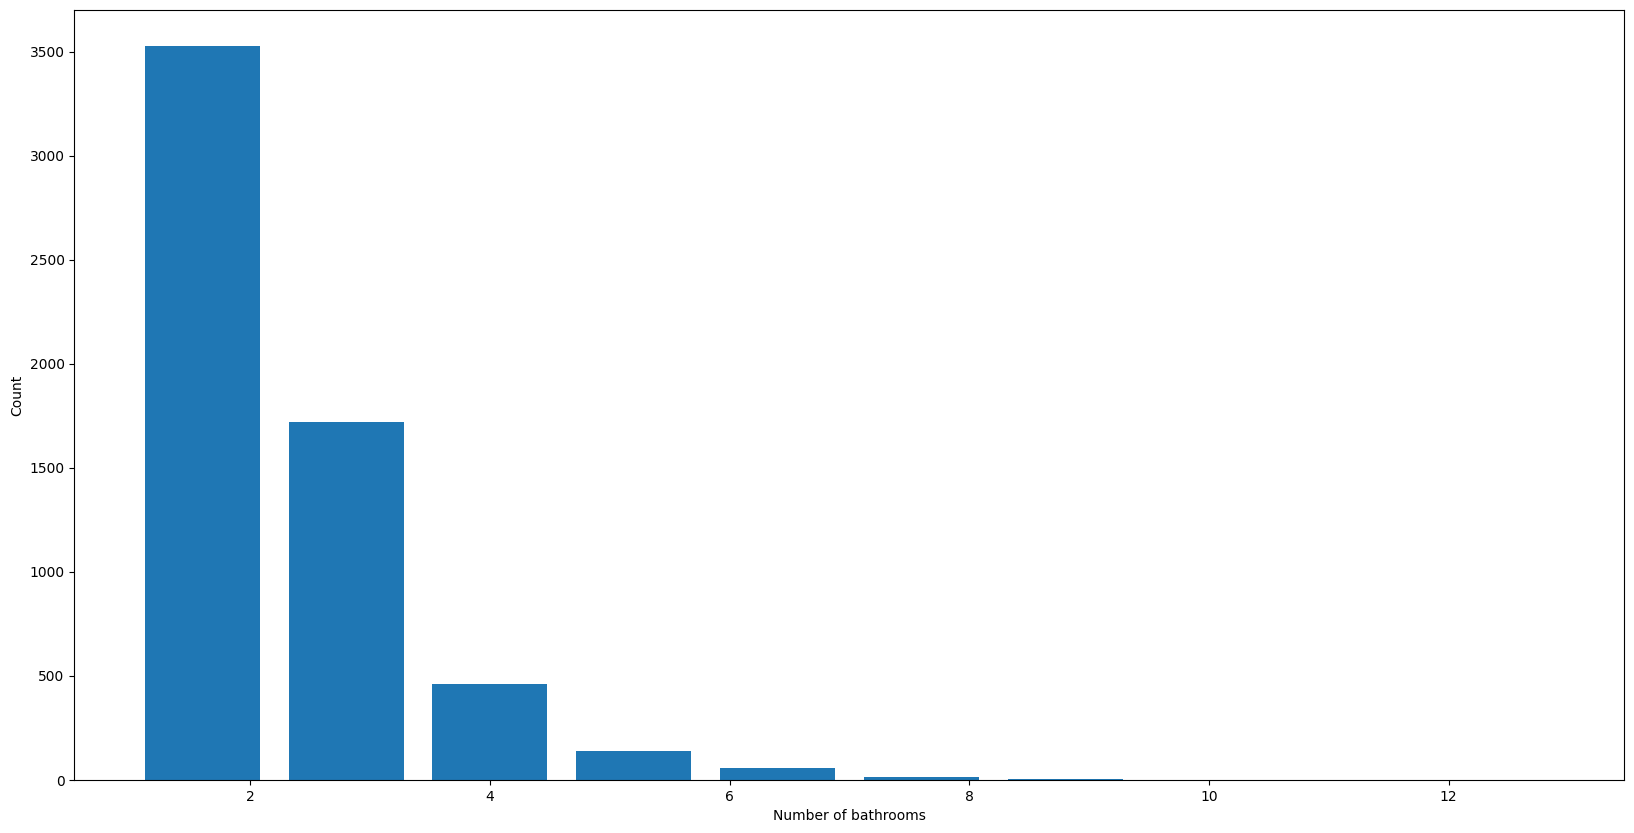

In [99]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

**There are some houses with so many bathrooms which is unusual.**

In [100]:
# show all houses where nr ob bathrooms is greater than 10 (unusual)
df1[df1.bath>10]

,location,total_sqft,bath,balcony,price,society_Bhe 2ko,society_Bhmesy,society_Dhalsh,society_GMown E,society_GrrvaGr,...,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other,price_per_sqft
8685,other,5425.0,13.0,0.0,275.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [101]:
# show all houses where nr of bathrooms is greater than 2 + nr of bedrooms
df1[df1.bath>df1.bhk + 2]

,location,total_sqft,bath,balcony,price,society_Bhe 2ko,society_Bhmesy,society_Dhalsh,society_GMown E,society_GrrvaGr,...,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other,price_per_sqft
2235,Thanisandra,1806.0,6.0,2.0,116.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,6423.034330
4564,other,11338.0,9.0,1.0,1000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,8819.897689


**According to the business manager, if there is 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed. Se we will remove all houses where nr of bathrooms is greater than 2 + nr of bedrooms.**

In [102]:
# shape of dataset before outlier removal
print(df1.shape)

(5913, 50)


In [103]:
df1 = df1[df1.bath < df1.bhk+2]

In [104]:
# # shape of dataset after outlier removal
print(df1.shape)

(5855, 50)


In [105]:
df1.drop(['price_per_sqft', 'location'], axis=1, inplace=True)

In [106]:
df1.shape

(5855, 48)

In [107]:
# def reduce_categories_train(dataset, feature, top_k):
    
#     top_k_frequencies = dataset[feature].value_counts(ascending=False)[:top_k] 
#     top_k_categories = top_k_frequencies.index
#     total_nr_categories = len(dataset[feature].unique())
#     nr_categories_other = len([cat for cat in dataset[feature].unique() if cat not in top_k_categories])
#     print(f"Nr of categories (low frequency categories) labeled with 'other' : {nr_categories_other} out of total {total_nr_categories}")
#     print(f"Nr of categories not labeled with 'other' : {top_k}")
#     dataset[feature] = dataset[feature].apply(lambda x: x if x in top_k_categories else 'other')

#     dataset = pd.get_dummies(dataset, columns=[feature], drop_first=True)
            
#     return dataset, top_k_categories

In [108]:
# def reduce_categories_test(dataset, feature, top_k_categories):
    
#     dataset[feature] = dataset[feature].apply(lambda x: x if x in top_k_categories else 'other')
#     dataset = pd.get_dummies(dataset, columns=[feature], drop_first=True)
    
#     return dataset

### Step 5 : Train Test Split

**Train Test Split must be performed before feature scaling in order to avoid data leakage. (we want to keep test data completetly unseen and consider it just like new data that will come in future so we must not know anything about test data.**

In [109]:
# feature-label separation
X = df1.drop('price', axis=1)
y = df1['price']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Step 6 : Data Transformation (Gaussian Transformation)

**Since one of the ML estimators i will train in Linear Regression and it assumes that the features are normally distributed we must transform the continuos features which have some skewness into normally distributed data.**

(array([7.480e+02, 2.634e+03, 8.590e+02, 2.620e+02, 9.000e+01, 5.000e+01,
        2.800e+01, 8.000e+00, 3.000e+00, 2.000e+00]),
 array([ 340., 1006., 1672., 2338., 3004., 3670., 4336., 5002., 5668.,
        6334., 7000.]),
 <BarContainer object of 10 artists>)

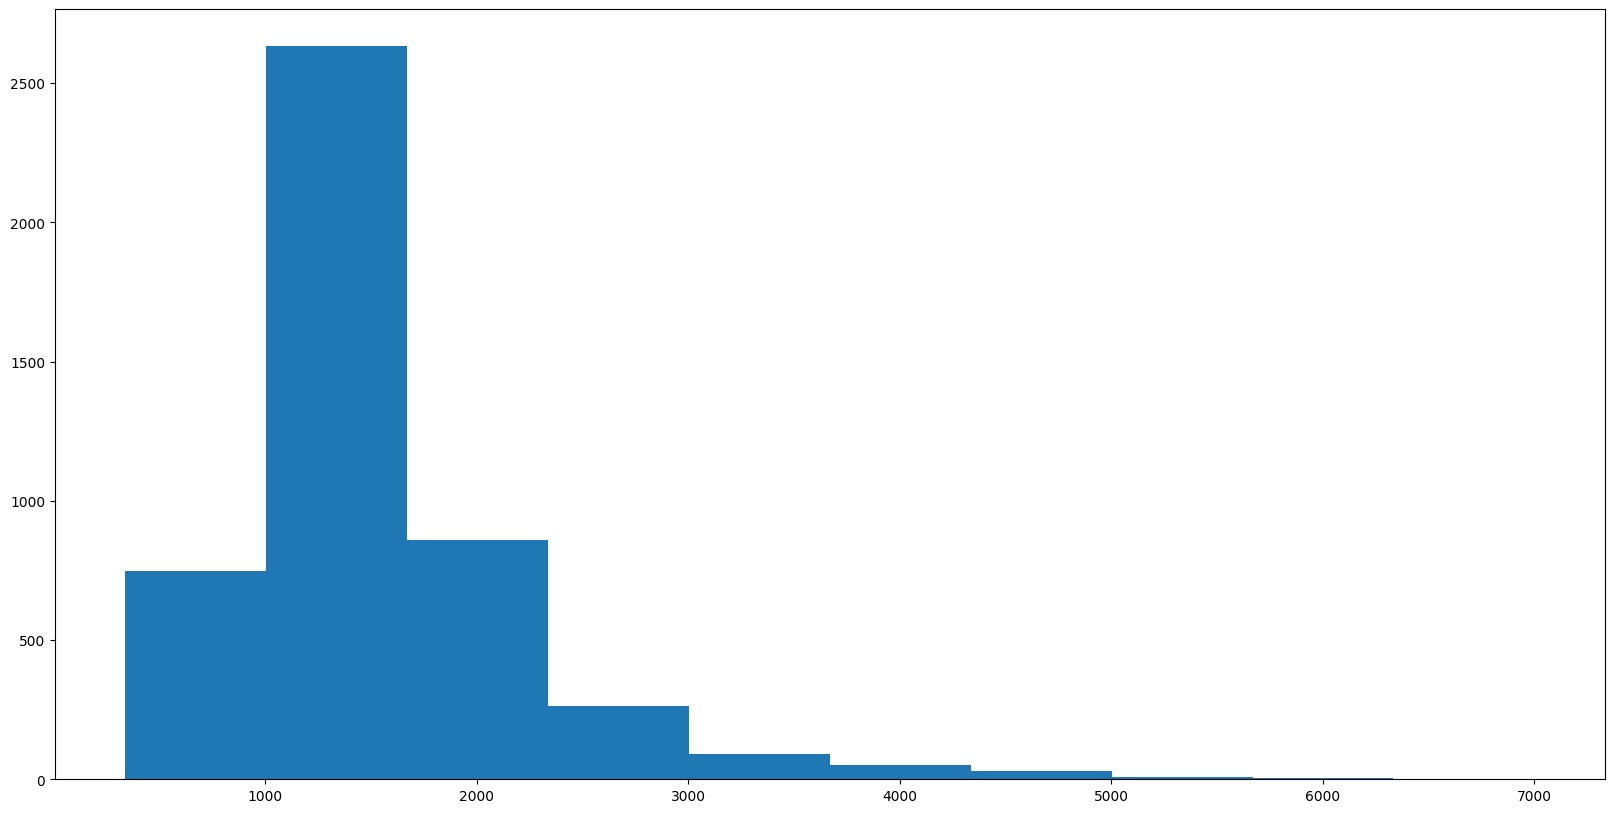

In [120]:
plt.hist(X_train['total_sqft'])

(array([2.819e+03, 1.375e+03, 3.670e+02, 9.600e+01, 1.400e+01, 1.000e+01,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

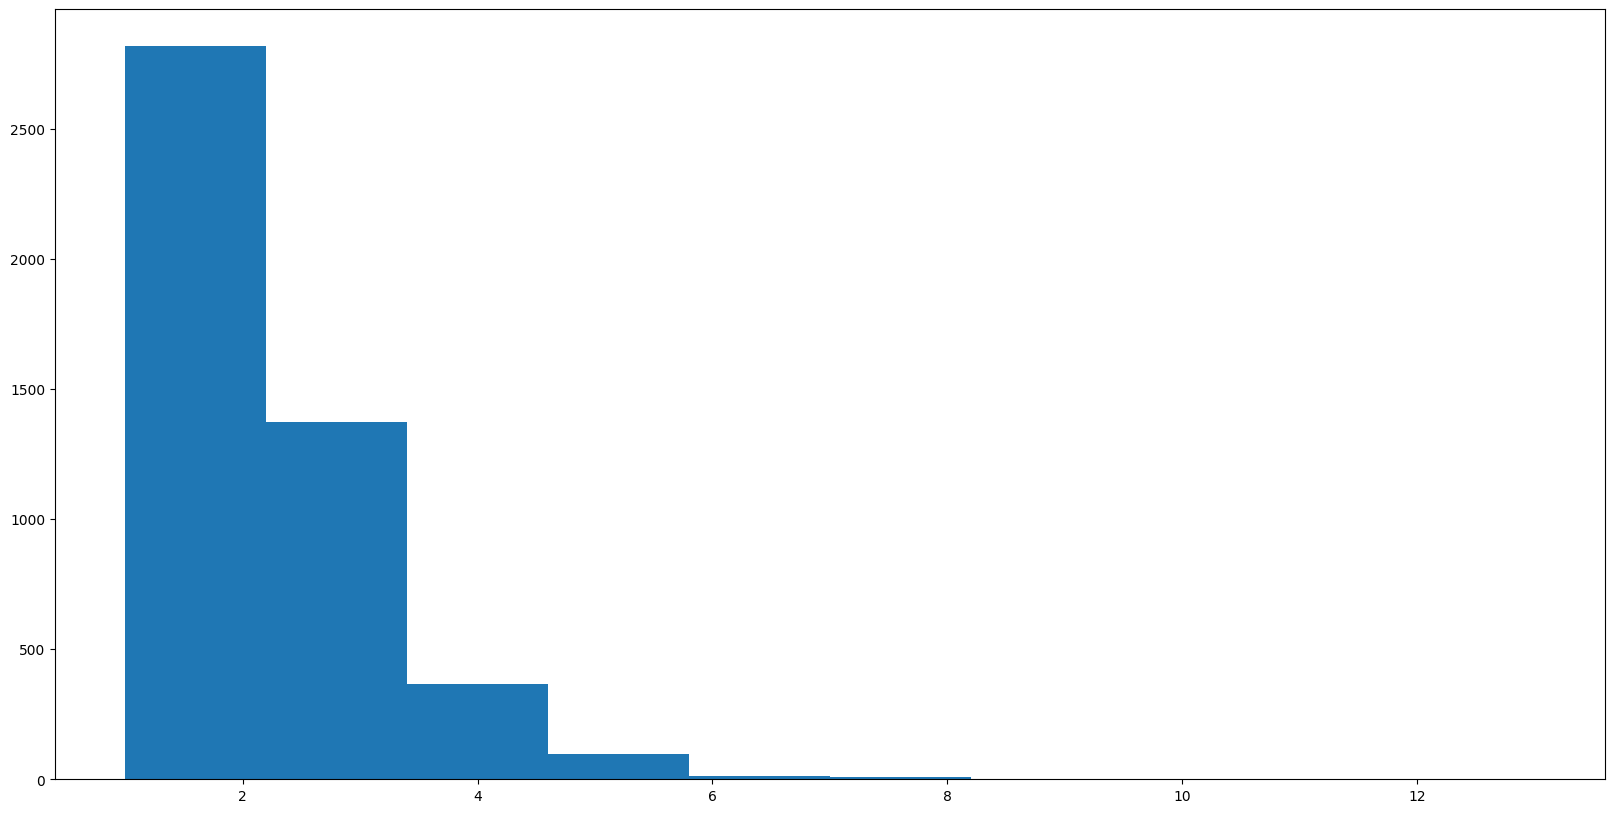

In [121]:

plt.hist(X_train['bath'])

**We can clearly see that total_sqft and bath features are right skewed. They do not follow the Gaussian Distribution. I will apply different Gaussian Transformation Techniques in order to tranform these features into normally distributed data**

Types of Gaussian Transformations that i will apply: 
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [122]:
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt
import numpy as np

* If we want to check whether feature is guassian or normal distributed using Q-Q plot
* On the left side we have the distribution of the feature. On the right side we check if the distribution follows the Gaussian Distribution. If the points follow the line, it means that the data follows more the Gaussian Distribution.

In [123]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [124]:
def transformation_plot(df, features):
    for var in features:
        print(f'Data Transformation of Feature : {var}')
        
        # real distribution of feature
        print('Real Distribution')
        plot_data(df, var)
    
        # log transformation
        print('Log Transformation')
        if 0 in df[var].unique():
            df[var] = df[var] + 1
            
        df[var+'_log']=np.log(df[var])
        plot_data(df, var+'_log' )

        # reciprocal transformation
        print('Reciprocal Transformation')
        df[var + '_reciprocal'] = 1/df[var]
        plot_data(df, var + '_reciprocal')

        # square root transformation
        print('Square root transformation')
        df[var+'_square'] = df[var]**(1/2)
        plot_data(df, var+'_square')

        # exponential transformation
        print('Exponential Tranformation')
        df[var+'_exponential'] = df[var]**(1/1.2)
        plot_data(df, var+'_exponential')

        # boxcox transformation
        print('Boxcox Transformation')
        df[var+'_Boxcox'],parameters=stat.boxcox(df[var])
        plot_data(df, var+'_Boxcox')

Data Transformation of Feature : total_sqft
Real Distribution


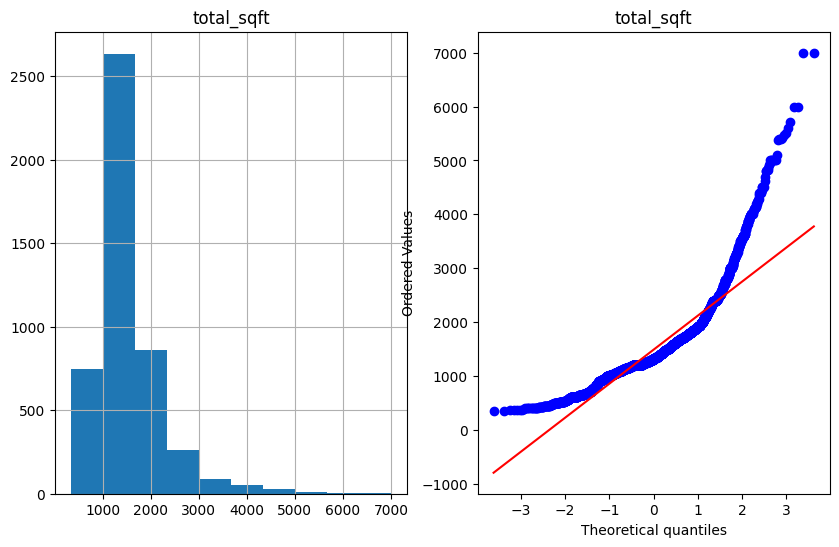

Log Transformation


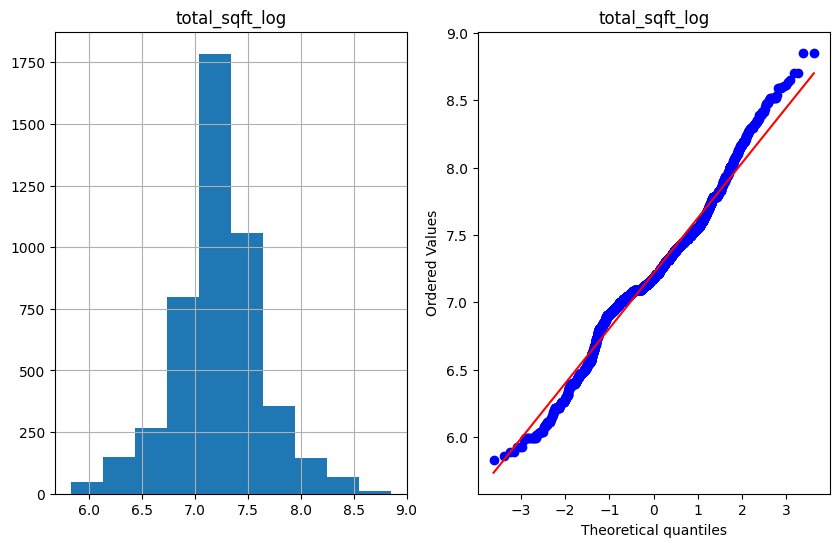

Reciprocal Transformation


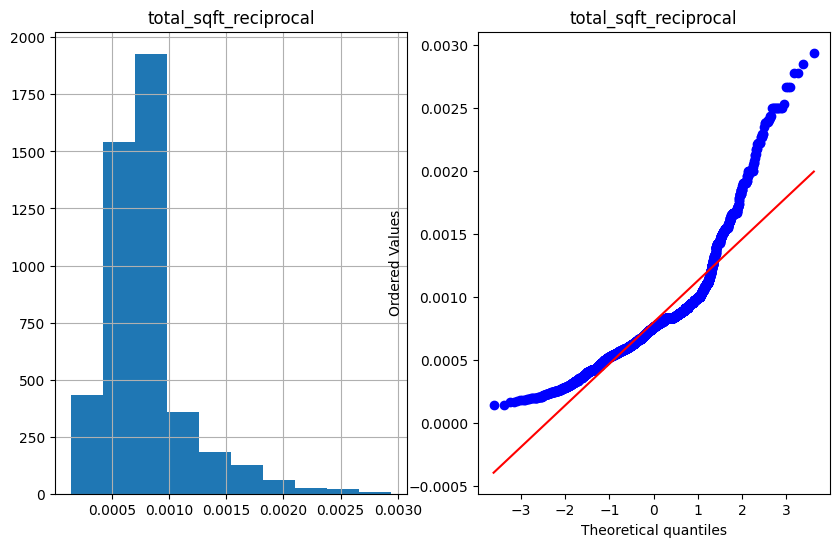

Square root transformation


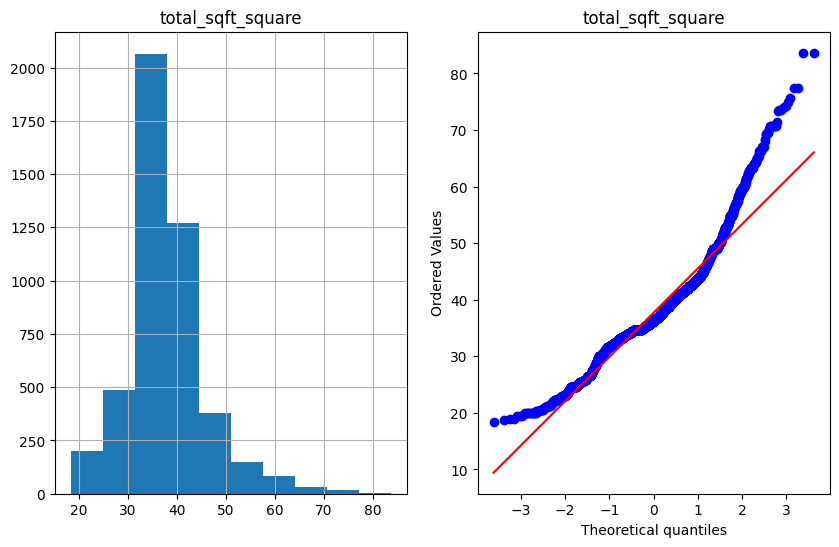

Exponential Tranformation


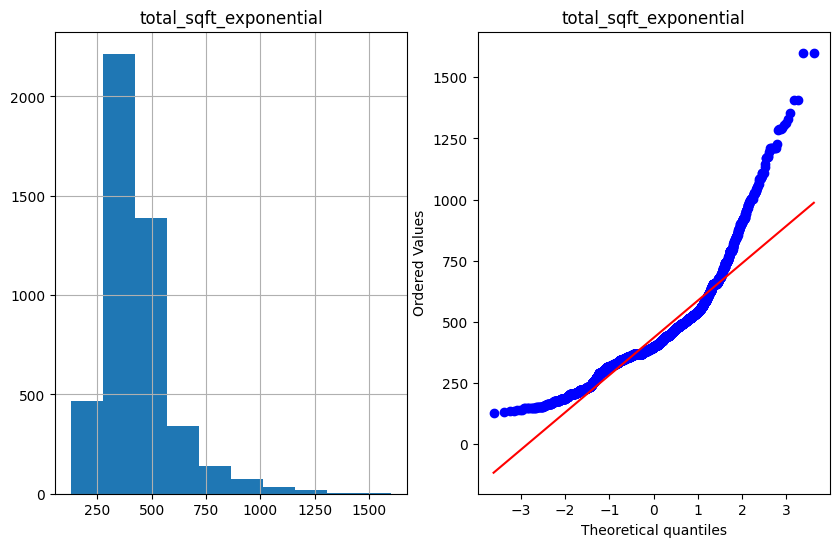

Boxcox Transformation


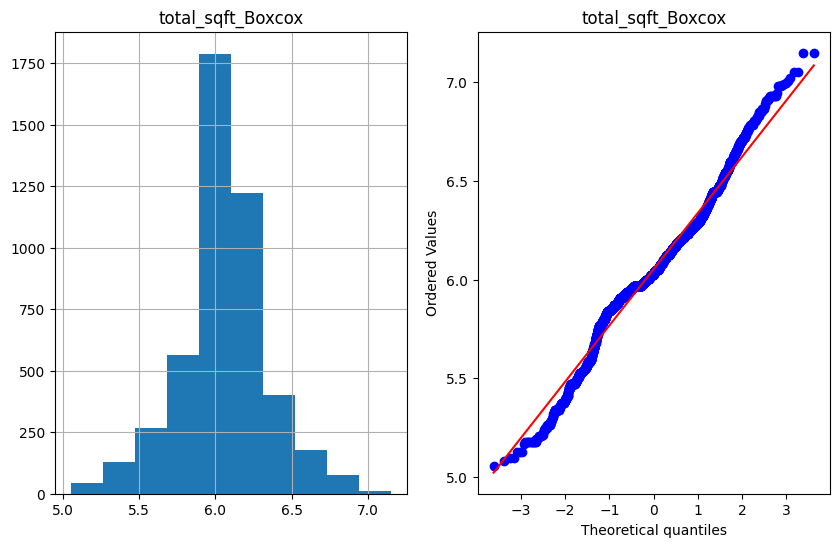

Data Transformation of Feature : bath
Real Distribution


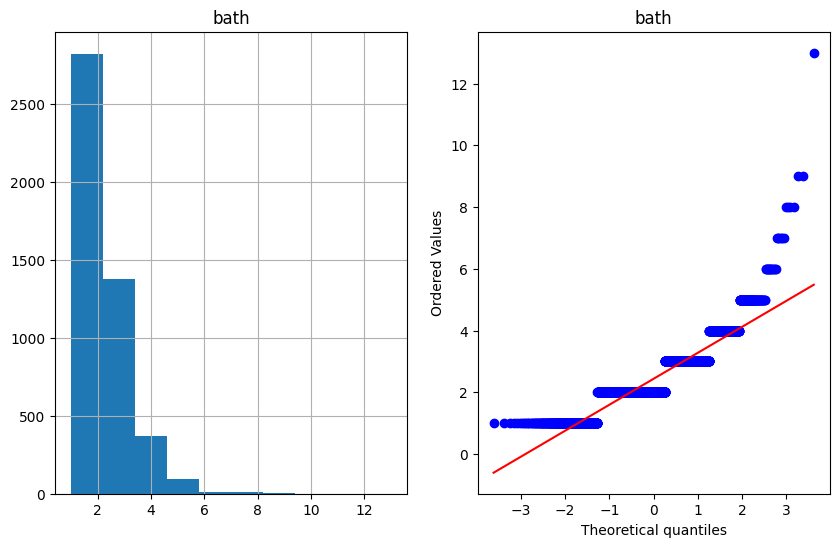

Log Transformation


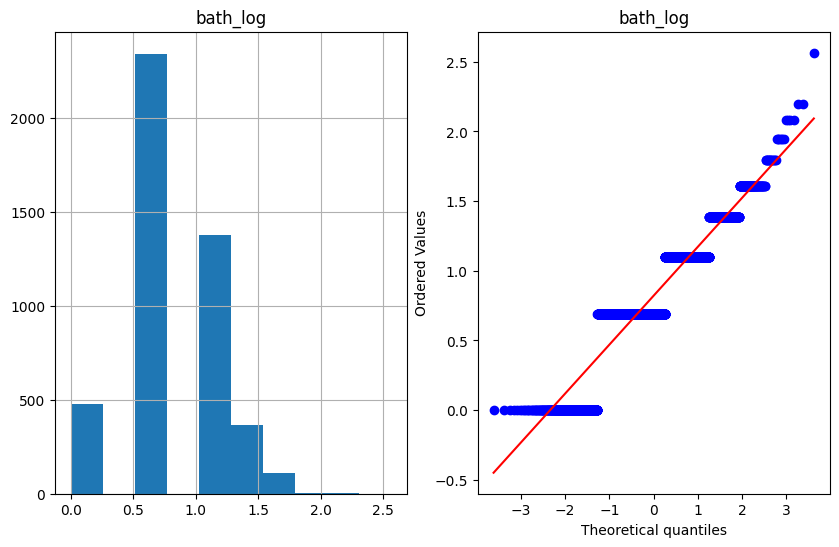

Reciprocal Transformation


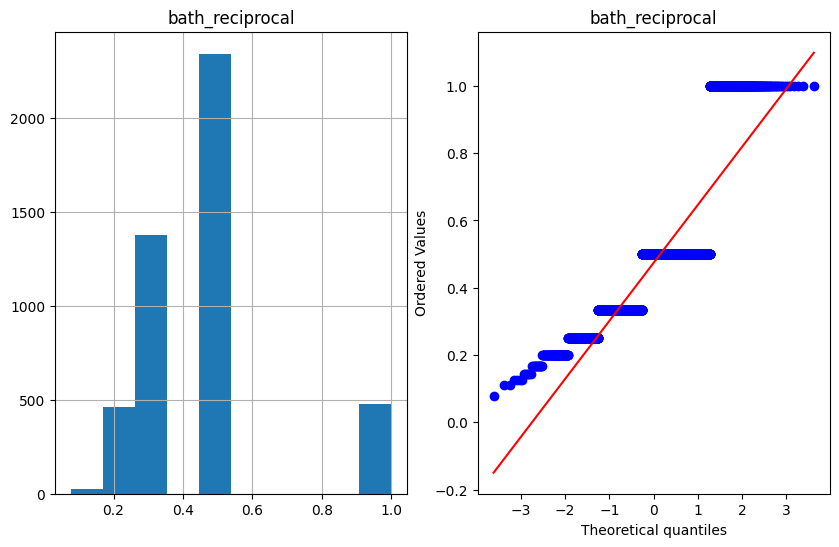

Square root transformation


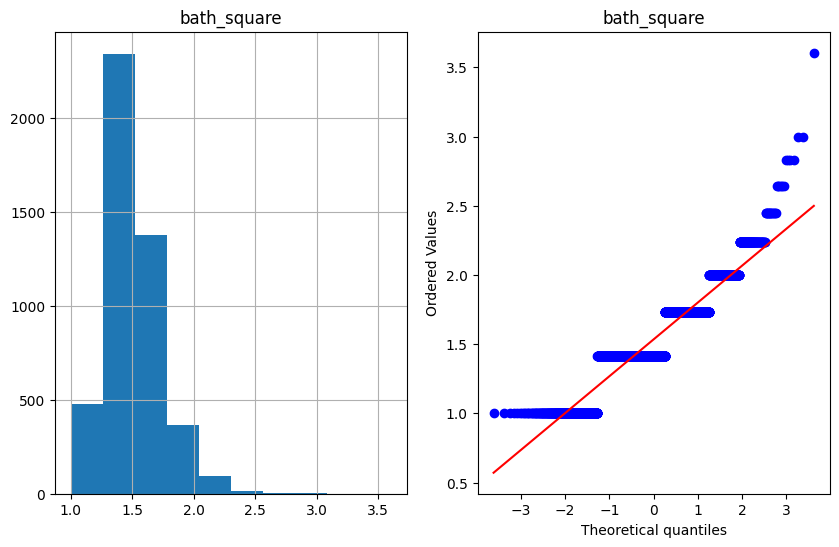

Exponential Tranformation


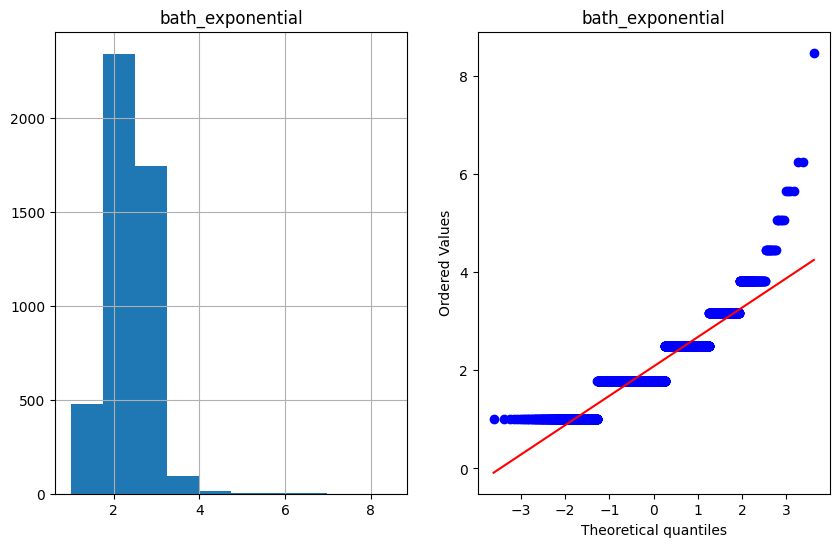

Boxcox Transformation


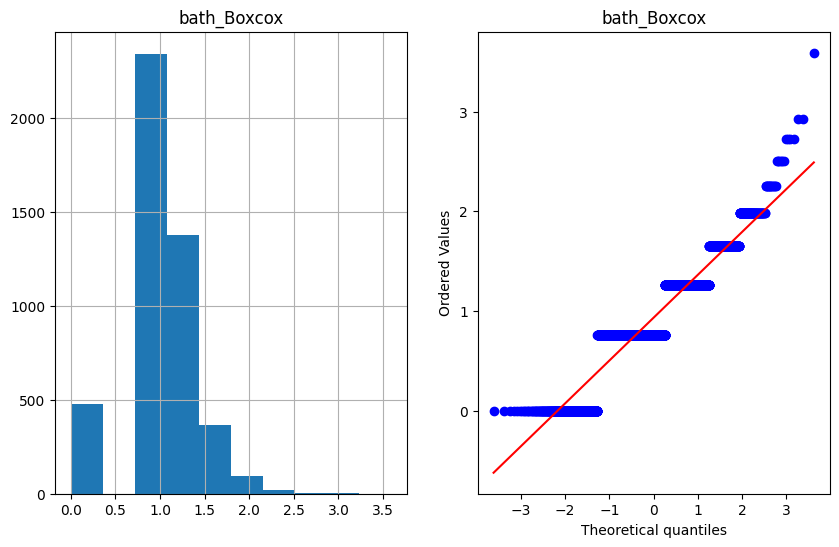

Data Transformation of Feature : balcony
Real Distribution


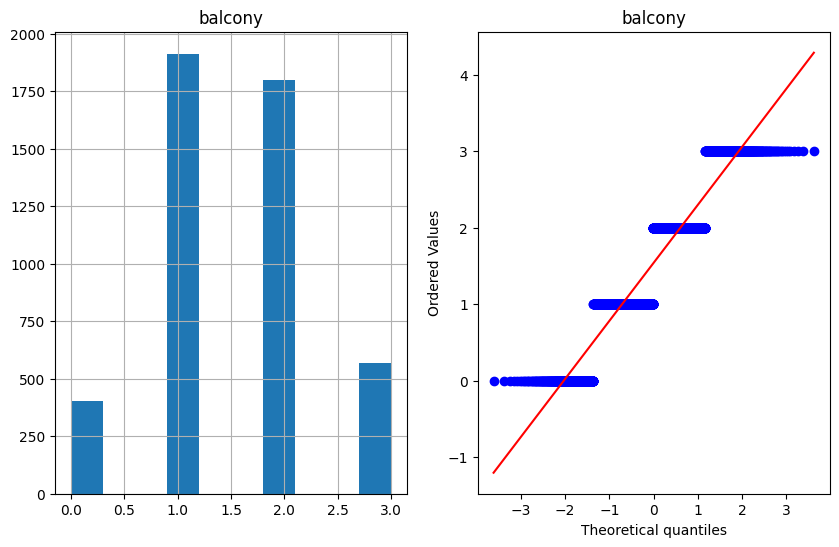

Log Transformation


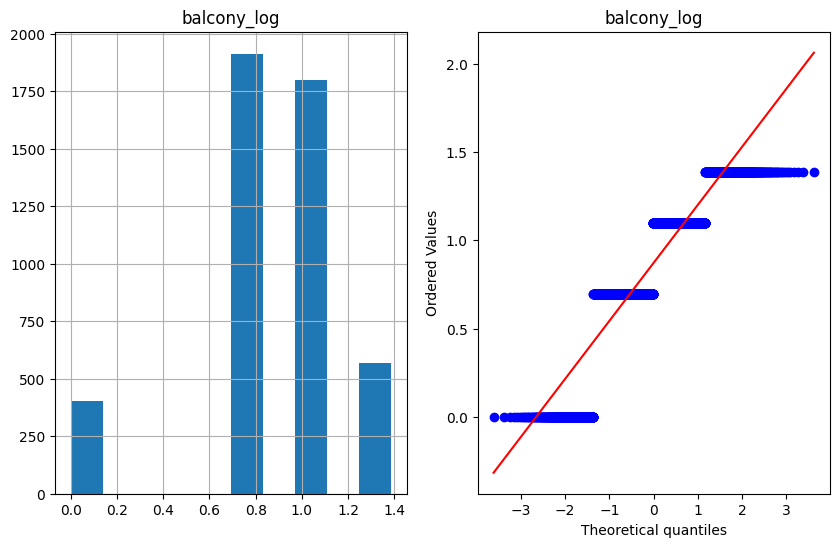

Reciprocal Transformation


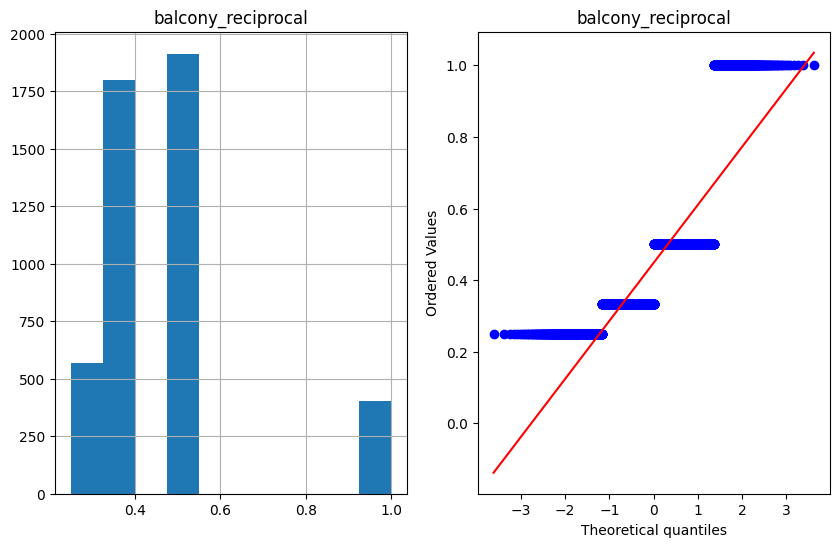

Square root transformation


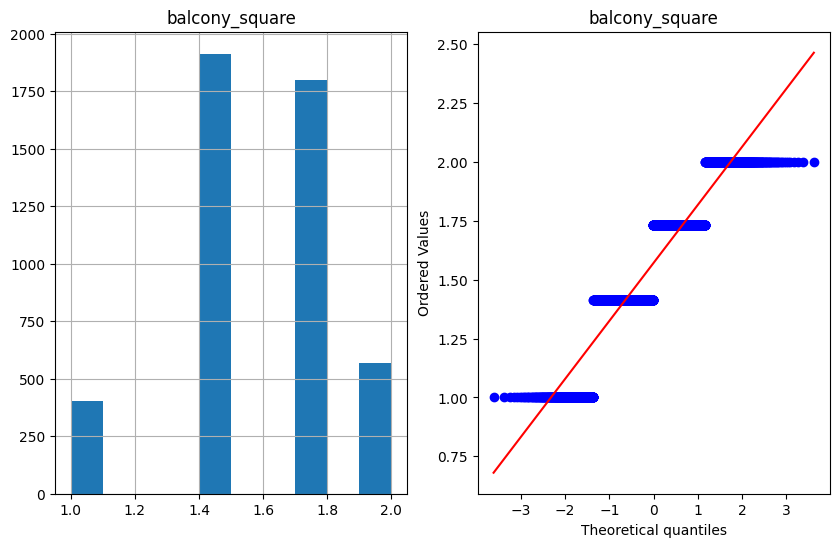

Exponential Tranformation


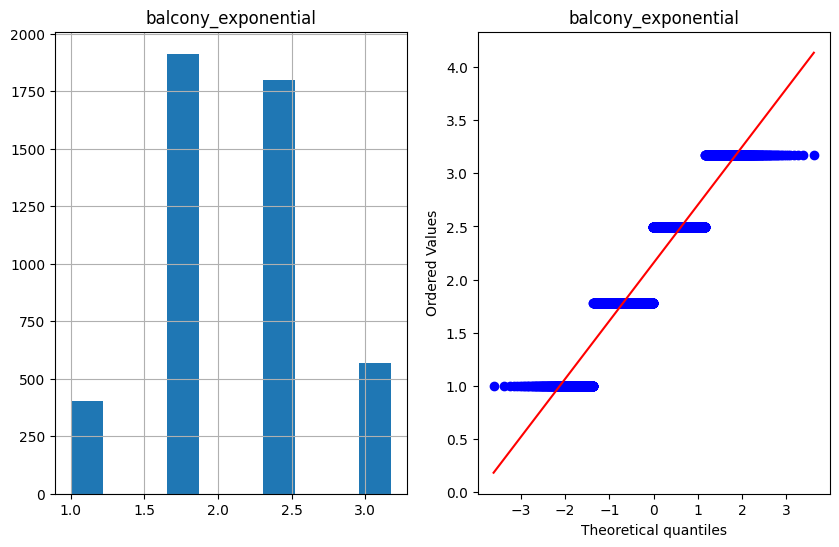

Boxcox Transformation


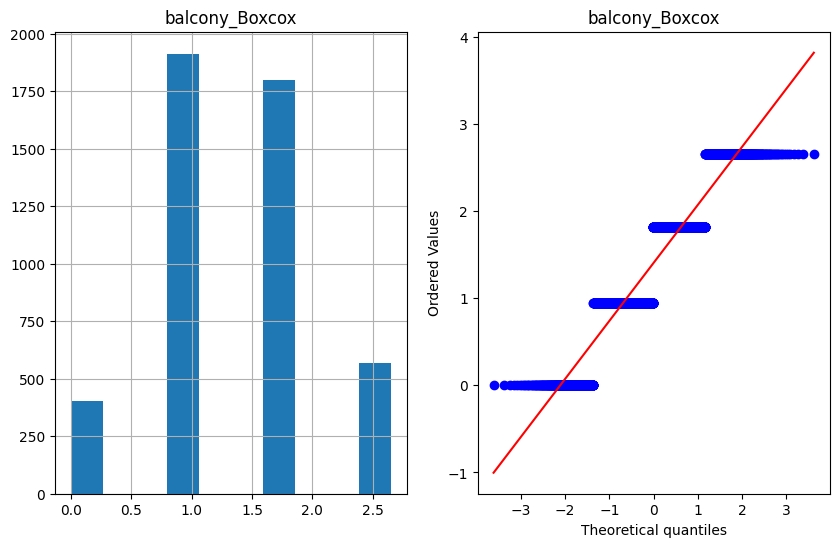

In [125]:
# create a copy of dataframe in order to not affect the original dataframe
transform_X_train = X_train.copy()
transformation_plot(transform_X_train, ['total_sqft', 'bath', 'balcony'])

**We must choose the best transformation. For Feature total_sqft log and boxcox transformation seem to work the best. I am going with log transformation. For feature bath boxcox transformation seem to work better than other transformations. Balcony is close to normal distribution so i am not going to apply any transformation to this feature**

In [126]:
# apply transformations to normally distributed data
X_train['total_sqft'] = np.log(X_train['total_sqft'])
X_train['bath'],parameters = stat.boxcox(X_train['bath'])

X_test['total_sqft'] = np.log(X_test['total_sqft'])
X_test['bath'],parameters = stat.boxcox(X_test['bath'])

(array([  48.,  151.,  267.,  800., 1785., 1056.,  354.,  144.,   67.,
          12.]),
 array([5.82894562, 6.1314176 , 6.43388958, 6.73636156, 7.03883354,
        7.34130552, 7.6437775 , 7.94624948, 8.24872147, 8.55119345,
        8.85366543]),
 <BarContainer object of 10 artists>)

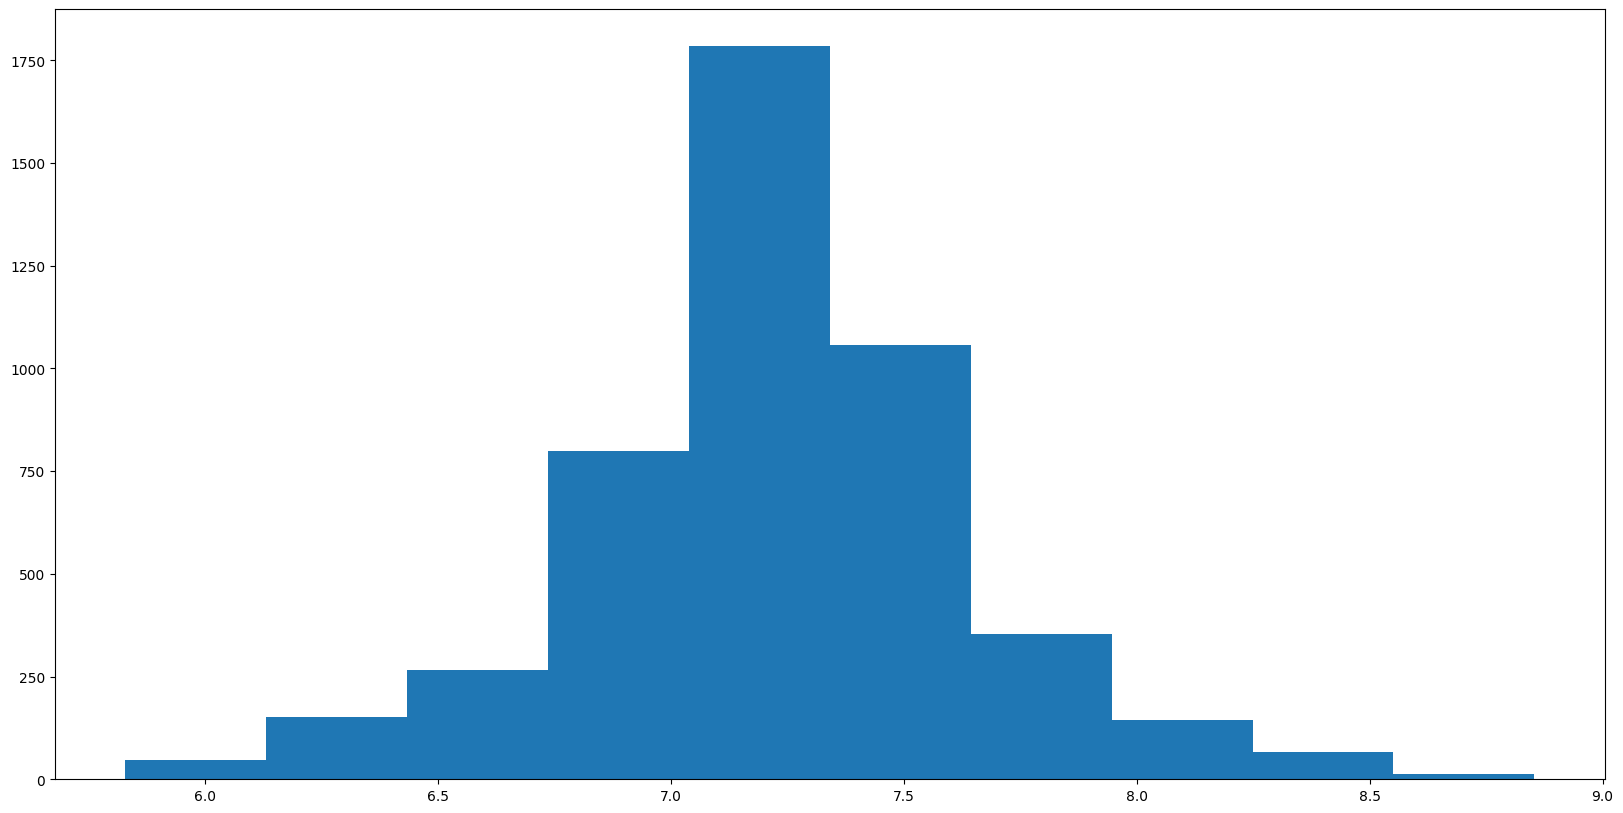

In [127]:
# check distributions after transformations
plt.hist(X_train['total_sqft'])

(array([4.770e+02, 0.000e+00, 2.342e+03, 1.375e+03, 3.670e+02, 9.600e+01,
        2.000e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([0.        , 0.35906825, 0.7181365 , 1.07720474, 1.43627299,
        1.79534124, 2.15440949, 2.51347774, 2.87254599, 3.23161423,
        3.59068248]),
 <BarContainer object of 10 artists>)

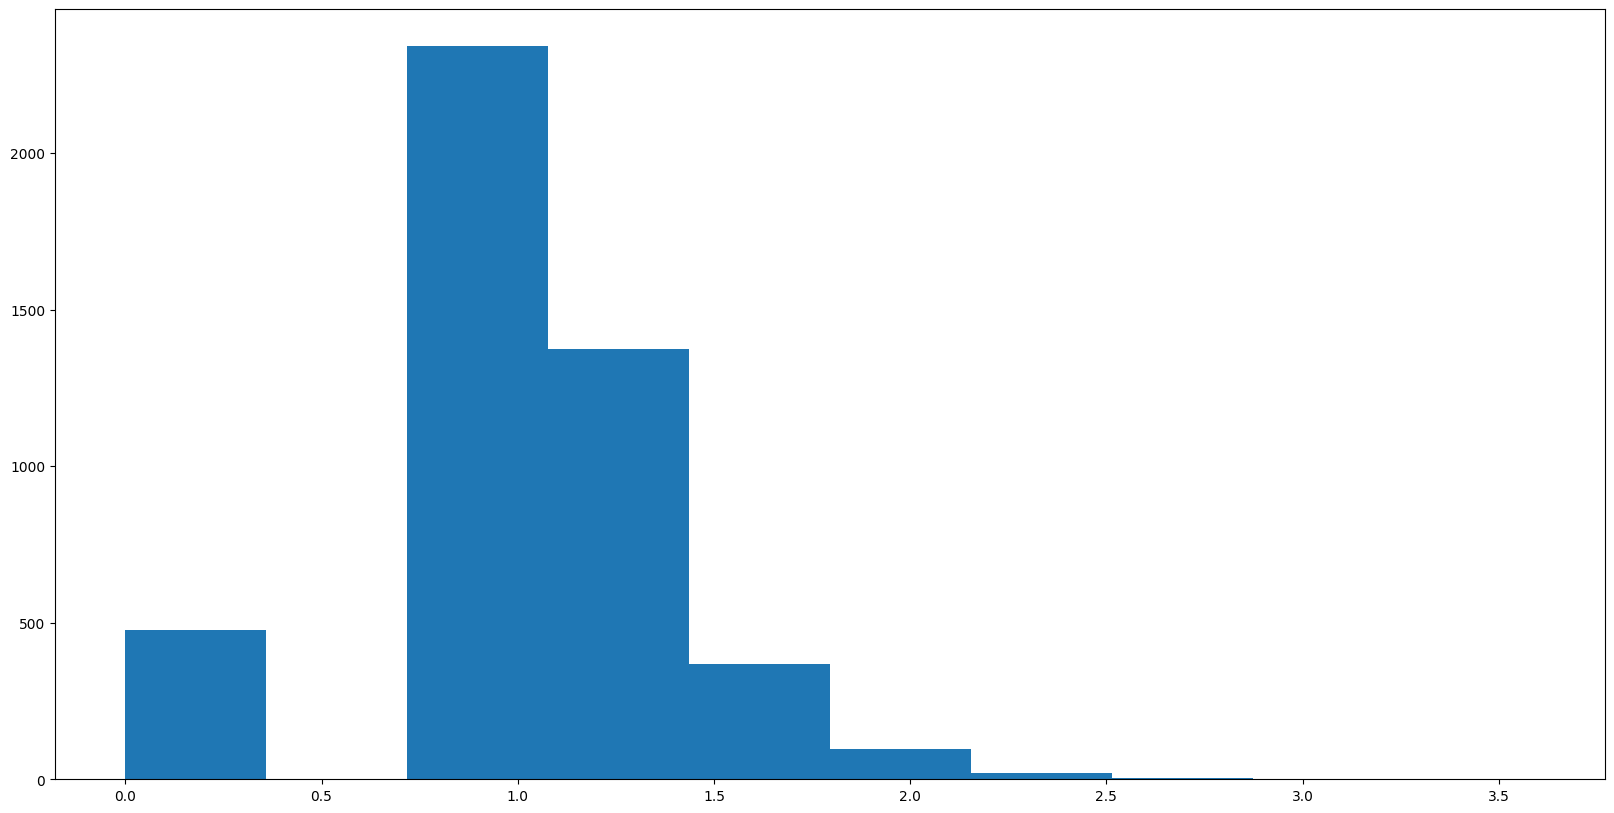

In [128]:
plt.hist(X_train['bath'])

<Axes: >

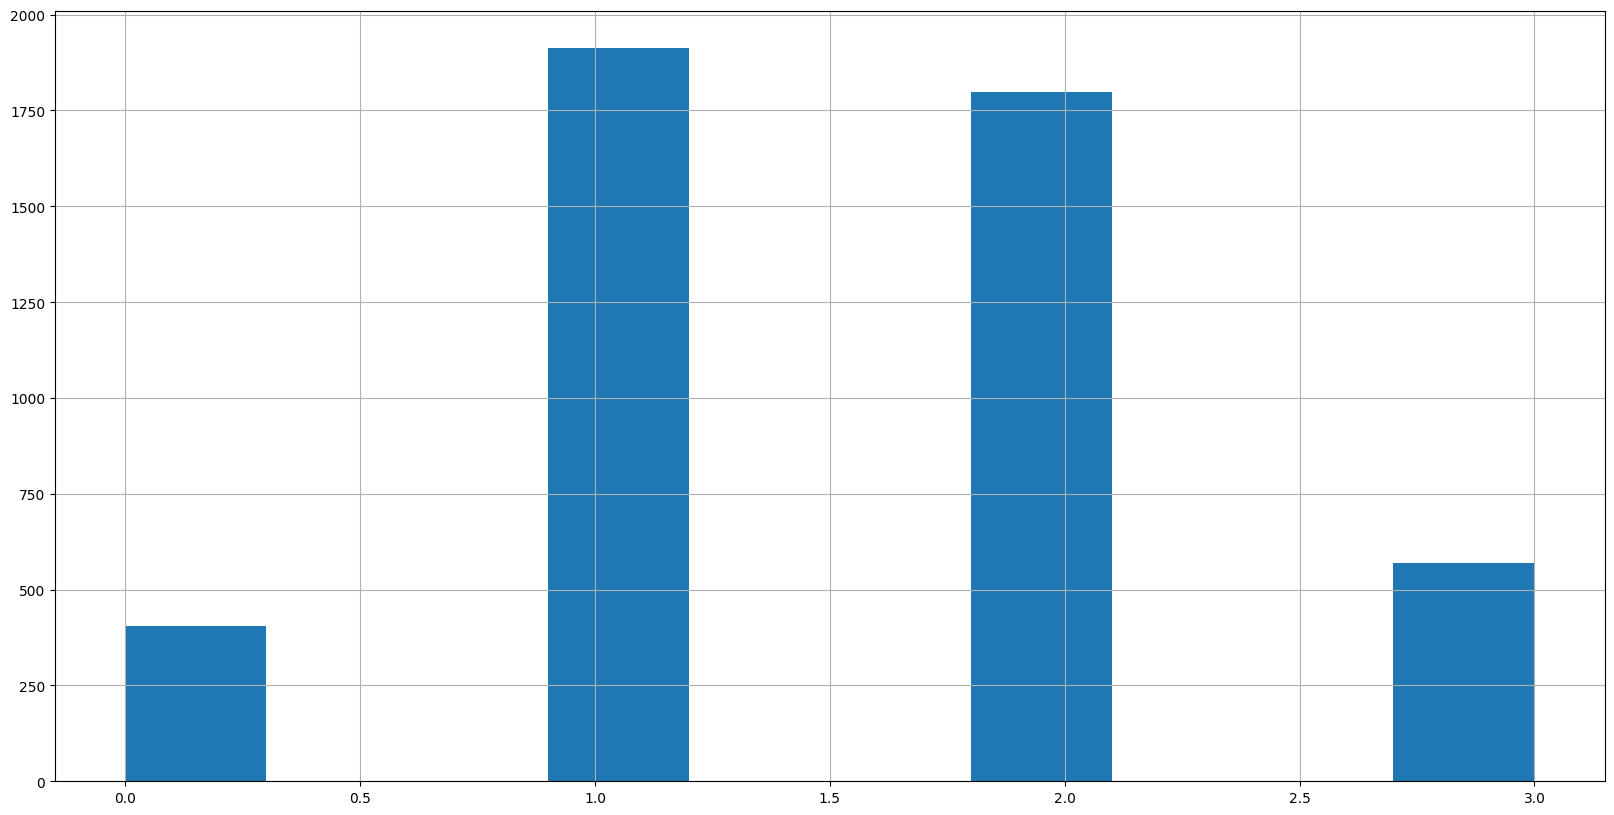

In [129]:
X_train['balcony'].hist()

## Feature Selection

### Step 7 : Dropping Constant Features

**Remove the constant feature on test set without checking if it is constant in test set because we suppose we dont know any information about test data.**

In [130]:
from sklearn.feature_selection import VarianceThreshold


def dropping_constant_features(X_train, X_test, threshold):
    var_thres = VarianceThreshold(threshold=threshold)
    var_thres.fit(X_train)
    
    cols = X_train.columns[var_thres.get_support()]
    features_low_variance = [feature for feature in X_train.columns if feature not in cols]
    print(f'Features with variance={threshold} : {features_low_variance}. Amount : {len(features_low_variance)} out of {len(X_train.columns)} total features')
    
    X_train = X_train[cols]
    X_test = X_test[cols] # remove the constant feature on test set without checking if it is constant in test set
    return X_train, X_test


X_train, X_test = dropping_constant_features(X_train, X_test, threshold=0)
X_train.head()

Features with variance=0 : ['society_Dhalsh ']. Amount : 1 out of 47 total features


,total_sqft,bath,balcony,society_Bhe 2ko,society_Bhmesy,society_GMown E,society_GrrvaGr,society_IBityin,society_Missing,society_PrarePa,...,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
6481,7.313220,0.756583,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10105,7.323171,1.263636,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7383,7.279319,1.263636,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5172,7.173192,0.756583,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4064,7.297091,1.263636,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [131]:
X_test.head()

,total_sqft,bath,balcony,society_Bhe 2ko,society_Bhmesy,society_GMown E,society_GrrvaGr,society_IBityin,society_Missing,society_PrarePa,...,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
282,6.745236,0.776296,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3605,7.134891,0.776296,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3282,5.915998,0.000000,0.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3688,7.090077,1.746003,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10181,7.090077,0.776296,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Step 8 : Handling Multicolleniarity

#### Step 7.1 Detecting Multicolleniarity

In [132]:

def correlation_heatmap(X_train):
    plt.figure(figsize=(30, 22))
    cor = X_train.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
    plt.savefig('multicolleniarity_heatmap.jpg')

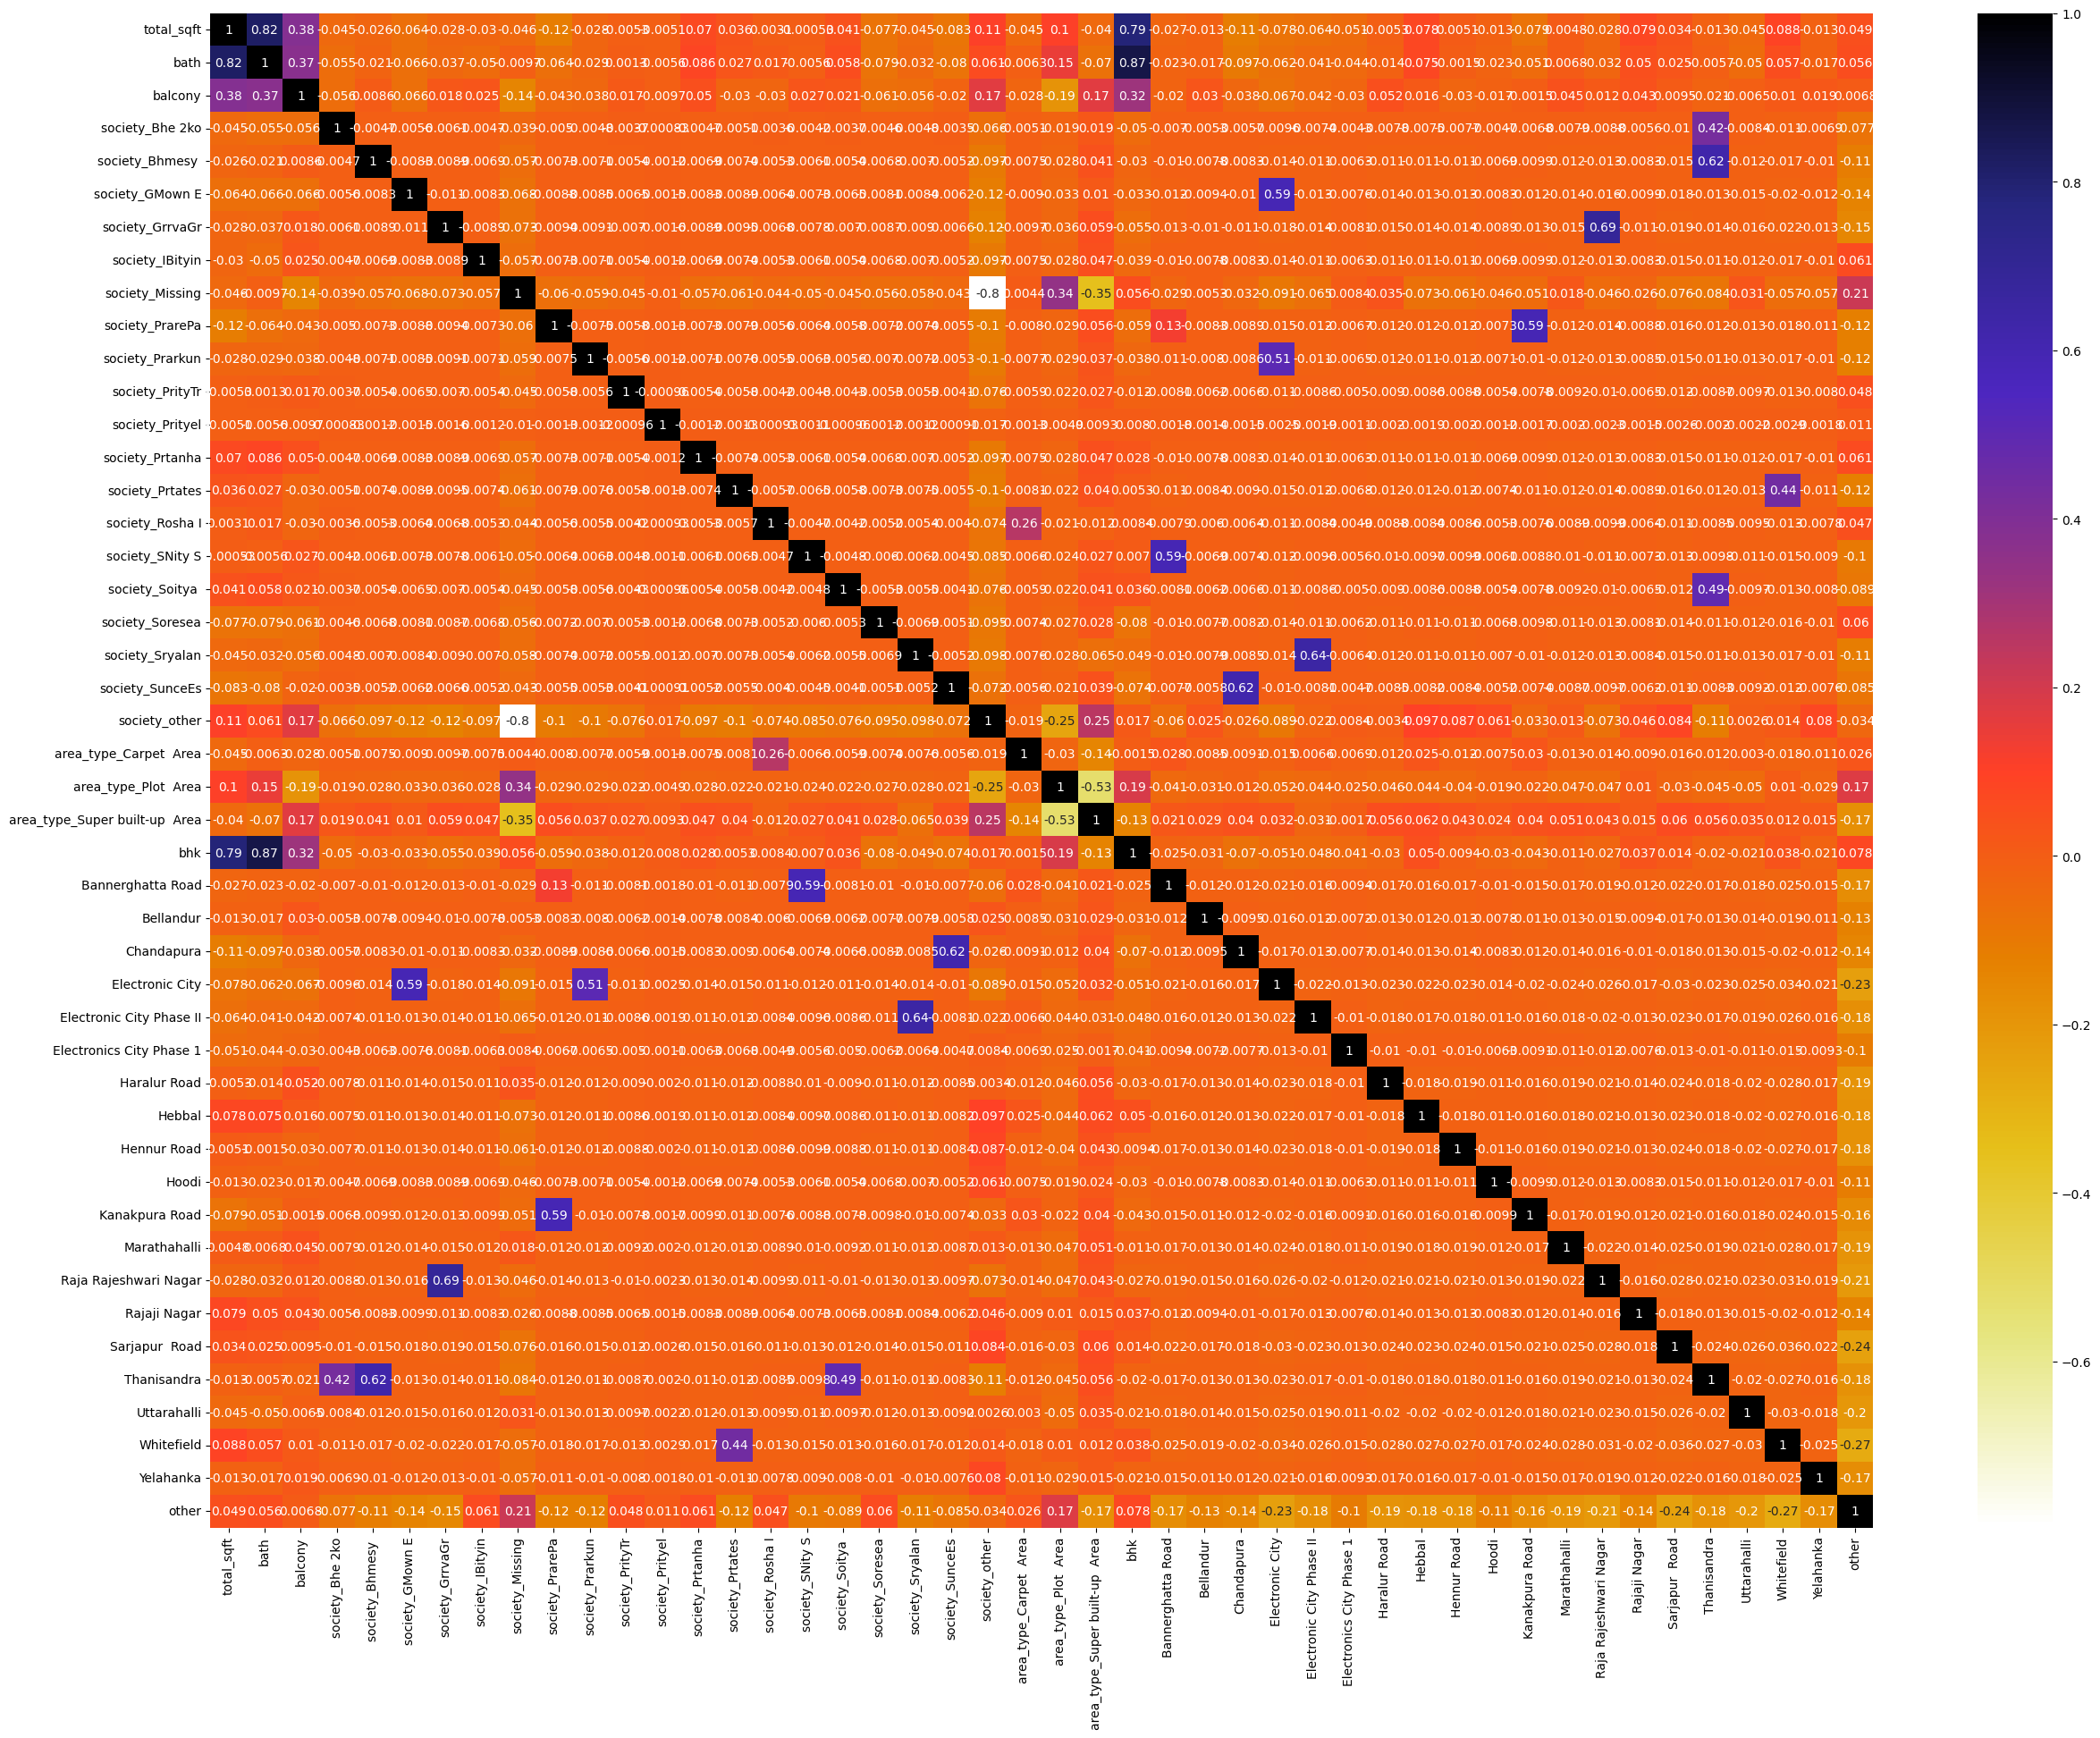

In [133]:
correlation_heatmap(X_train)

**Since we have many features its little difficult to check from the correlation heatmap which features are correlated to each other. Thats way i will use a function which returns highly correlated features. We must give the threshold/correlation coefficient.**

In [134]:
def detect_multicolleniarity(dataset, threshold):
    pairs = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                pairs.add((colname1, colname2, corr_matrix.iloc[i,j]))
                
    
    print('High correlated indepedent features are : ' + str(pairs))

    return pairs


In [135]:
corr_features = detect_multicolleniarity(X_train, 0.7)
#print(corr_features)

High correlated indepedent features are : {('bath', 'total_sqft', 0.819753048848537), ('bhk', 'total_sqft', 0.7890877604982584), ('bhk', 'bath', 0.8680305282814105), ('society_other', 'society_Missing', -0.7969945101584537)}


#### Step 7.2 Handling Multicolleniarty : Removing Redundant Features

**We have a group of 3 correlated independent features which are bath, total_sqft and bhk. bath - total_sqft, bhk - total_sqft, bhk - bath. We must keep the feature which is highest correlated with target feature and remove the 2 other features.**

In [136]:
def remove_correlated_independent_features(X_train, y_train, X_test, features_correlated, target_feature):
    train_data = pd.concat([X_train, y_train], axis=1)
    corr_with_target = abs(train_data.corr()[target_feature][features_correlated])
    logical_vector = abs(train_data.corr()[target_feature]) == np.max(corr_with_target)
    feature_highest_correlation_with_target = train_data.corr()[target_feature].index[logical_vector][0]
    features_to_remove = [feature for feature in features_correlated if feature not in feature_highest_correlation_with_target]
    
    print(f'Feature with Highest Correlation with Target Feature : {feature_highest_correlation_with_target}')
    print(f'Features to remove : {features_to_remove}')
    
    new_X_train = X_train.drop(columns=features_to_remove, axis=1)
    new_X_test = X_test.drop(columns=features_to_remove, axis=1)
    
    return new_X_train, new_X_test

In [137]:
X_train, X_test = remove_correlated_independent_features(X_train, y_train, X_test, ['bath', 'total_sqft', 'bhk'], 'price')
X_train, X_test = remove_correlated_independent_features(X_train, y_train, X_test, ['society_other', 'society_Missing'], 'price')

Feature with Highest Correlation with Target Feature : total_sqft
Features to remove : ['bath', 'bhk']
Feature with Highest Correlation with Target Feature : society_other
Features to remove : ['society_Missing']


In [138]:
print(X_train.shape)
print(X_test.shape)

(4684, 43)
(1171, 43)


In [139]:
X_train.head()

,total_sqft,balcony,society_Bhe 2ko,society_Bhmesy,society_GMown E,society_GrrvaGr,society_IBityin,society_PrarePa,society_Prarkun,society_PrityTr,...,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
6481,7.313220,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10105,7.323171,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7383,7.279319,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5172,7.173192,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4064,7.297091,1.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [140]:
X_test.head()

,total_sqft,balcony,society_Bhe 2ko,society_Bhmesy,society_GMown E,society_GrrvaGr,society_IBityin,society_PrarePa,society_Prarkun,society_PrityTr,...,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
282,6.745236,1.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3605,7.134891,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3282,5.915998,0.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3688,7.090077,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10181,7.090077,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [141]:
# check that we removed bath and bhk and society_missing from training set 
'bath' in X_train.columns or 'bhk' in X_train.columns or 'society_missing' in X_train.columns

False

In [142]:
# check that we removed bath and bhk from test set 
'bath' in X_test.columns or 'bhk' in X_test.columns or 'society_missing' in X_test.columns

False

In [143]:
# check that training and test set have same columns and in same order
np.array_equal(X_train.columns, X_test.columns)

True

In [144]:
X_train.head()

,total_sqft,balcony,society_Bhe 2ko,society_Bhmesy,society_GMown E,society_GrrvaGr,society_IBityin,society_PrarePa,society_Prarkun,society_PrityTr,...,Kanakpura Road,Marathahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Sarjapur Road,Thanisandra,Uttarahalli,Whitefield,Yelahanka,other
6481,7.313220,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10105,7.323171,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7383,7.279319,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5172,7.173192,3.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4064,7.297091,1.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [145]:
updated_cols = X_train.columns
updated_cols

Index(['total_sqft', 'balcony', 'society_Bhe 2ko', 'society_Bhmesy ',
       'society_GMown E', 'society_GrrvaGr', 'society_IBityin',
       'society_PrarePa', 'society_Prarkun', 'society_PrityTr',
       'society_Prityel', 'society_Prtanha', 'society_Prtates',
       'society_Rosha I', 'society_SNity S', 'society_Soitya ',
       'society_Soresea', 'society_Sryalan', 'society_SunceEs',
       'society_other', 'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'Bannerghatta Road', 'Bellandur',
       'Chandapura', 'Electronic City', 'Electronic City Phase II',
       'Electronics City Phase 1', 'Haralur Road', 'Hebbal', 'Hennur Road',
       'Hoodi', 'Kanakpura Road', 'Marathahalli', 'Raja Rajeshwari Nagar',
       'Rajaji Nagar', 'Sarjapur  Road', 'Thanisandra', 'Uttarahalli',
       'Whitefield', 'Yelahanka', 'other'],
      dtype='object')

In [146]:
encoded_features = {}
encoded_features['total_sqft'] = ['total_sqft']
encoded_features['balcony'] = ['balcony']
encoded_features['society'] = ['society_Bhe 2ko', 'society_Bhmesy ',
       'society_GMown E', 'society_GrrvaGr', 'society_IBityin',
       'society_PrarePa', 'society_Prarkun', 'society_PrityTr',
       'society_Prityel', 'society_Prtanha', 'society_Prtates',
       'society_Rosha I', 'society_SNity S', 'society_Soitya ',
       'society_Soresea', 'society_Sryalan', 'society_SunceEs',
       'society_other']

encoded_features['area_type'] = ['area_type_Carpet  Area', 'area_type_Plot  Area', 'area_type_Super built-up  Area']
encoded_features['location'] = ['Bannerghatta Road', 'Bellandur',
       'Chandapura', 'Electronic City', 'Electronic City Phase II',
       'Electronics City Phase 1', 'Haralur Road', 'Hebbal', 'Hennur Road',
       'Hoodi', 'Kanakpura Road', 'Marathahalli', 'Raja Rajeshwari Nagar',
       'Rajaji Nagar', 'Sarjapur  Road', 'Thanisandra', 'Uttarahalli',
       'Whitefield', 'Yelahanka', 'other']

print(encoded_features)

{'total_sqft': ['total_sqft'], 'balcony': ['balcony'], 'society': ['society_Bhe 2ko', 'society_Bhmesy ', 'society_GMown E', 'society_GrrvaGr', 'society_IBityin', 'society_PrarePa', 'society_Prarkun', 'society_PrityTr', 'society_Prityel', 'society_Prtanha', 'society_Prtates', 'society_Rosha I', 'society_SNity S', 'society_Soitya ', 'society_Soresea', 'society_Sryalan', 'society_SunceEs', 'society_other'], 'area_type': ['area_type_Carpet  Area', 'area_type_Plot  Area', 'area_type_Super built-up  Area'], 'location': ['Bannerghatta Road', 'Bellandur', 'Chandapura', 'Electronic City', 'Electronic City Phase II', 'Electronics City Phase 1', 'Haralur Road', 'Hebbal', 'Hennur Road', 'Hoodi', 'Kanakpura Road', 'Marathahalli', 'Raja Rajeshwari Nagar', 'Rajaji Nagar', 'Sarjapur  Road', 'Thanisandra', 'Uttarahalli', 'Whitefield', 'Yelahanka', 'other']}


### Step 9 Model Creation, Tuning and Evaluation. 

**Hyperparameter will be tuned together with feature selection and feature scaling using Pipelines in order to avoid data leakage.**

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [148]:
# A. First (short) Way : using Pipeline
# pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k=10)),
#                      ('feature_scaler', StandardScaler()),
#                      ('estimator', LinearRegression())])

# pipeline.fit(X_train, y_train)
# pipeline.score(X_test, y_test)

In [149]:
# # B. Second (long) Way 
# # 1. Feature Selection
# feature_selector = SelectKBest(score_func=mutual_info_regression, k=10)
# selected_X_train = feature_selector.fit_transform(X_train, y_train)
# selected_X_test = feature_selector.transform(X_test)

# # 2. Features Scaling
# feature_scaler = StandardScaler()
# selected_scaled_X_train = feature_scaler.fit_transform(selected_X_train)
# selected_scaled_X_test = feature_scaler.transform(selected_X_test)

# # 3. Model Creation
# estimator = LinearRegression()
# estimator.fit(selected_scaled_X_train, y_train)
# estimator.score(selected_scaled_X_test, y_test)

In [150]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

def tuning_single_hyperparameter(model, path, X_train, y_train, hyperparameter_name, hyperparameter_space, scoring, 
                                 cv=5, verbose=False, graph=True):
    try:
        print('Entered function tuning_single_hyperparameter.')
        
        parent_path = 'Single_Hyperparameter_Tuning/'
        if os.path.exists(parent_path) == False:
            os.mkdir(parent_path)
        
        
        model_path = parent_path + path 
        if os.path.exists(model_path) == False:
            os.mkdir(model_path)
            

        
        train_scores = []
        validation_scores = []
        

        #max_depth = [3, 5, 7, 9, 11, 13, 15]
        for x in hyperparameter_space:
            dic = {hyperparameter_name : x}
            model.set_params(**dic)
            scores = cross_validate(model, X_train, y_train, scoring=scoring,
                                  cv=cv, return_train_score=True, n_jobs=-1, verbose=verbose)
    
            train_scores.append(np.mean(scores['train_score']))
            validation_scores.append(np.mean(scores['test_score']))
        
        
            
        if graph:
        
            line1, = plt.plot(hyperparameter_space, train_scores, 'b', label='Train AUC')
            line2, = plt.plot(hyperparameter_space, validation_scores, 'r', label='Validation AUC')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel(scoring)
            plt.xlabel(hyperparameter_name)
            plt.savefig(model_path + hyperparameter_name + '_graph.jpg')
            plt.show()
        
            print('Function tuning_single_hyperparameter Completed Successfully. Exited this function.')
            return train_scores, validation_scores 
        else:
            print('Function tuning_single_hyperparameter Completed Successfully. Exited this function.')
            return train_scores, validation_scores
        
    except Exception as e:
        print('Error occured in function tuning_single_hyperparameter. Error Message : ' + str(e))

In [151]:
def train_model(model, X_train, y_train):
    try:
        print('Entered the function train_model')
        model.fit(X_train, y_train)
        
        print('Function train_model Completed Successfully! Exited this function.')
        return model
    except Exception as e:
        print('Error occured in function train_model. Error Messaeg : ' + str(e))

In [152]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model_regression(model, X, y):
    try:
        print('Entered function evaluate_model_regression.')
        
        r2 = model.score(X, y)
        
        pred = model.predict(X)
        adj_r2 = r2_score(y, pred)  
        
        mse = mean_squared_error(y, pred)
        mae = mean_absolute_error(y, pred)
        squareroot_mse = np.sqrt(mse)
        
        print('R Squared : ' + str(r2))
        print('Adj R Squared : ' + str(adj_r2))
        print('MSE : ' + str(mse))
        print('MAE : ' + str(mae))
        print('Square Root MSE : ' + str(squareroot_mse))
        
        print('Function evaluate_model_regression Completed Successfully. Exited this function')
        
        return adj_r2
    
    except Exception as e:
        print('Error occured in function evaluate_model_regression. Error Message : '+str(e))

In [153]:
from sklearn.model_selection import cross_val_score

def evaluate_model_cross_validation(model, X_train, y_train, scoring, cv=5, verbose=False):
    try:
        print('Entered function evaluate_model_cross_validation.')
        scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, verbose=verbose)
    
        print('Function evaluate_model_cross_validation Completed Successfully.Exited this function.')
        
    except Exception as e:
        print('Error occured in function evaluate_model_cross_validation. Error Message : '+str(e))
    return scores

In [154]:
from sklearn.model_selection import RandomizedSearchCV

def HyperparameterTuning_RandomizedSearchCV(X_train, y_train, model, params, scoring, n_iter=20, cv=5, verbose=False):
    try:
        print('Entered the function HyperparameterTuning_RandomizedSearchCV.')
        
        search = RandomizedSearchCV(model, params, n_iter=n_iter, scoring=scoring, 
                                cv=cv, n_jobs=-1, verbose=verbose, random_state=1)
    
        
        search.fit(X_train, y_train)
        model.set_params(**search.best_params_)
    
        dic = {'tuned_model' : model,
               'best_hyperparameters' : search.best_params_,
               'best_cv_score' : search.best_score_}
        
        print('Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.')
        return dic
    
    except Exception as e:
        print('Error occured in function HyperparameterTuning_RandomizedSearchCV. Error message : ' + str(e))

In [155]:
from sklearn.base import clone
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import os
import shutil

def best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name, defaultModel, params, 
                                         cv_scoring, cv_kfold=5, cv_n_iter=20):
    
    try:
        print('Entered function best_single_model_RandomizedSearchCV. ')        
            
        # create copies of default model object to avoid unwanted changes
        def_model = clone(defaultModel)
        tun_model = clone(defaultModel)
    
        # 1. Default Model   
        # A) Evaluate model using cross validation
        default_model_cv_scores = evaluate_model_cross_validation(def_model, X_train, y_train, scoring=cv_scoring,
                                                                 cv=cv_kfold)
        default_model_cv_mean_score = np.mean(default_model_cv_scores)
        
        # B) Train KNN model with default hyperparameters
        default_model = train_model(def_model, X_train, y_train)
    
        # C) evaluate the model on test set and training set
        print(f'Default {model_name} Model Performance on TEST SET : ')
        Path_DefaultModel_TestData = 'DefaultModel_TestData_ConfusionMatrix/'
        default_model_test_score = evaluate_model_regression(default_model, X_test, y_test)
        
        print(f'Default {model_name} Model Performance on TRAINING SET : ')
        Path_DefaultModel_TrainingData = 'DefaultModel_TrainingData_ConfusionMatrix/'
        default_model_training_score = evaluate_model_regression(default_model, X_train, y_train)
    
        
        # 2. Tuned Model
        # If we want to use Optuna to tune Hyperparameters we call model_optuna function
        # A) Tune the model
        dic = HyperparameterTuning_RandomizedSearchCV(X_train=X_train, y_train=y_train, model=tun_model, 
                                       params=params, n_iter=cv_n_iter, scoring=cv_scoring, cv=cv_kfold)
        tunedModel = dic['tuned_model']
        best_params = dic['best_hyperparameters']
        tuned_model_cv_mean_score = dic['best_cv_score']
        
        # B) Calculate the cross validation scores and mean on training set
        tuned_model_cv_scores = evaluate_model_cross_validation(tunedModel, X_train, y_train, scoring=cv_scoring,
                                                                cv=cv_kfold)
        
        # B) Train the tuned model on training set
        tuned_model = train_model(tunedModel, X_train, y_train)
        
        # C) Evaluate the model on test set and training set
        print(f'Tuned Model {model_name} Performance on TEST SET : ')
        Path_TunedModel_TestData = 'TunedModel_TestData_ConfusionMatrix/'
        tuned_model_test_score = evaluate_model_regression(tuned_model, X_test, y_test)
        
        print(f'Tuned Model {model_name} Performance on TRAINING SET : ')
        Path_TunedModel_TrainingData = 'TunedModel_TrainingData_ConfusionMatrix/'
        tuned_model_training_score = evaluate_model_regression(tuned_model, X_train, y_train)
        
        # Find the best model with best score
        if tuned_model_test_score >= default_model_test_score:
            best_model_name = 'Tuned Model'
            best_model_object = tuned_model
            
        else:
            best_model_name = 'Default Model'
            best_model_object = default_model
    
        model_infos = {'Model Name' : model_name,
                       'Default Model Object' : default_model,
                       'Default Model Test Score' : default_model_test_score,
                       'Default Model Training Score' : default_model_training_score,
                       'Default Model CV Mean Score' : default_model_cv_mean_score,
                       'Default Model CV Scores' : default_model_cv_scores,
                       'Tuned Model Object' : tuned_model,
                       'Best Hyperparameters' : best_params,
                       'Tuned Model CV Mean Score' : tuned_model_cv_mean_score,
                       'Tuned Model CV Scores' : tuned_model_cv_scores,
                       'Tuned Model Test Score' : tuned_model_test_score,
                       'Tuned Model Training Score' : tuned_model_training_score,
                       'Final Best Model Name' : best_model_name,
                       'Final Best Test Score' : max(tuned_model_test_score, default_model_test_score),
                       'Final Best Model Object' : best_model_object}
                
        
        print('Function best_single_model_RandomizedSearchCV Completed Successfully. Exited this function.')
        return model_infos
    
        
    except Exception as e:
        print('Error occured in function best_single_model_RandomizedSearchCV. Error message : ' + str(e))    

### A) Find good Hyperparameter space for LinearRegression

**For Linear Regression there is no need to tune hyperparmeters since they do not affect model perforamnce at all. I will tune only the number of features selected.**

Entered function tuning_single_hyperparameter.


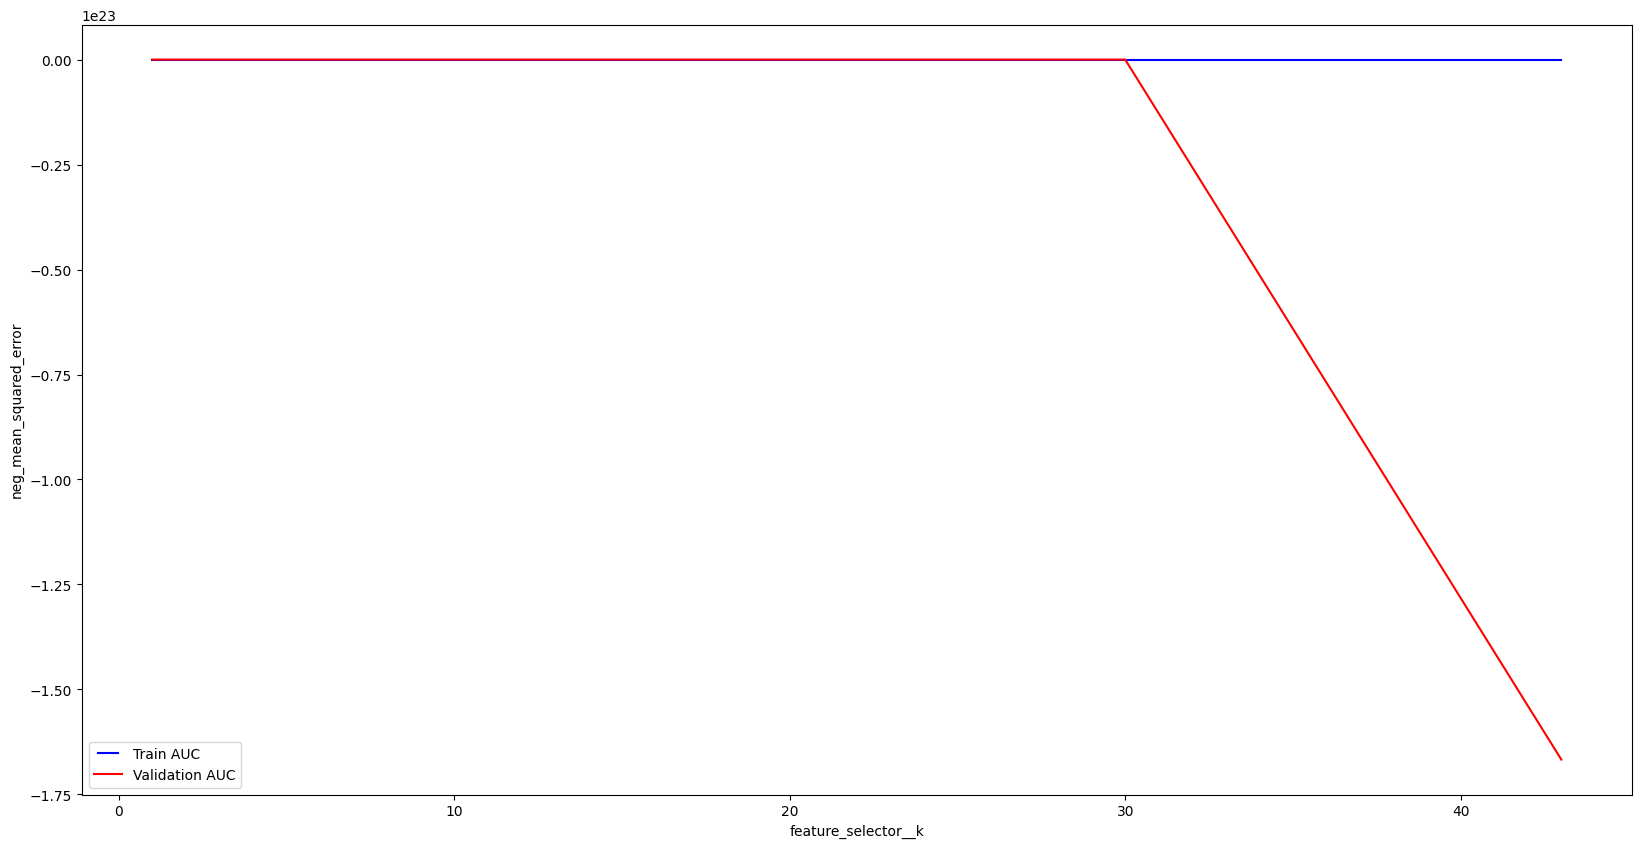

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Selected Features : 1 - Train Score : -1322.833981062853 , Validation Score : -1326.0453325021813
Nr Selected Features : 10 - Train Score : -1115.6563707544442 , Validation Score : -1164.497224107649
Nr Selected Features : 20 - Train Score : -977.185866917884 , Validation Score : -988.4516379074415
Nr Selected Features : 30 - Train Score : -916.1237184455637 , Validation Score : -937.4737319364546
Nr Selected Features : 43 - Train Score : -907.3831500148586 , Validation Score : -1.6670340120928818e+23


In [156]:
pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                     ('feature_scaler', StandardScaler()),
                     ('estimator', LinearRegression())])

space = [1, 10, 20, 30, 43]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'LinearRegression/', X_train, y_train, 
                                                        hyperparameter_name='feature_selector__k', hyperparameter_space=space,
                                                        scoring='neg_mean_squared_error', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Selected Features : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of nr selected features would be 30-43.

### B) Find good hyperparameter space for Random Forest

Entered function tuning_single_hyperparameter.


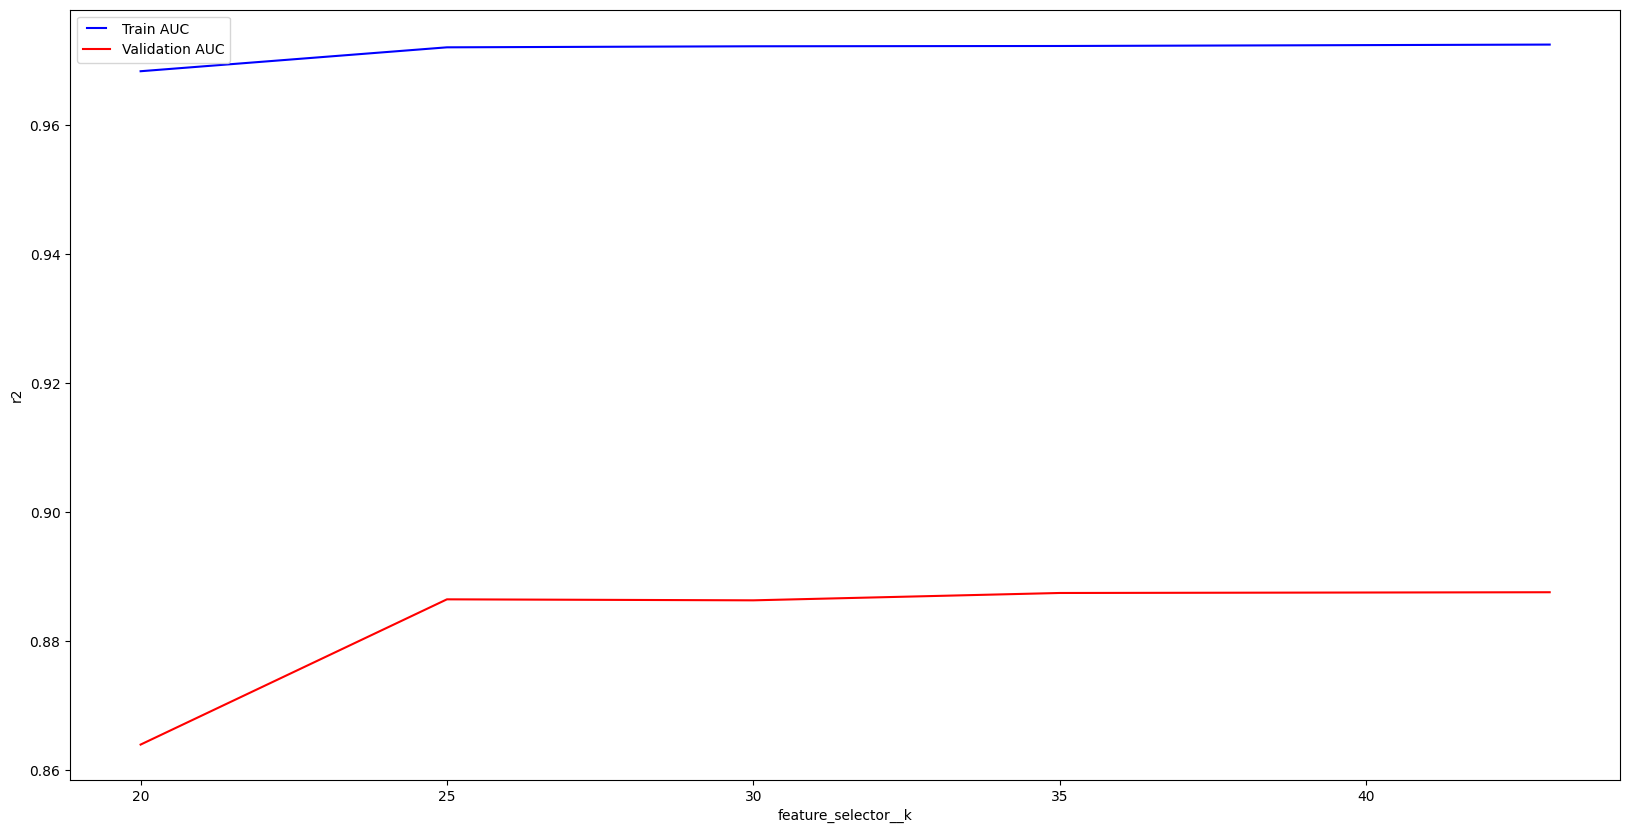

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Selected Features : 20 - Train Score : 0.9683974395876783 , Validation Score : 0.8639676003704558
Nr Selected Features : 25 - Train Score : 0.9721042944430656 , Validation Score : 0.8864935743326503
Nr Selected Features : 30 - Train Score : 0.9722662620340673 , Validation Score : 0.8863391010254782
Nr Selected Features : 35 - Train Score : 0.9723112386562788 , Validation Score : 0.8874788242661923
Nr Selected Features : 43 - Train Score : 0.9725297430057342 , Validation Score : 0.8875950787234105


In [157]:
pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                     ('feature_scaler', StandardScaler()),
                     ('estimator', RandomForestRegressor(random_state=1, n_estimators=300))])

space = [20, 25, 30, 35, 43]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'RandomForest/', X_train, y_train, 
                                                        hyperparameter_name='feature_selector__k', hyperparameter_space=space,
                                                        scoring='r2', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Selected Features : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of nr features selected would be 25-43. When nr features is greater than 25 the performance does not change at all.

Entered function tuning_single_hyperparameter.


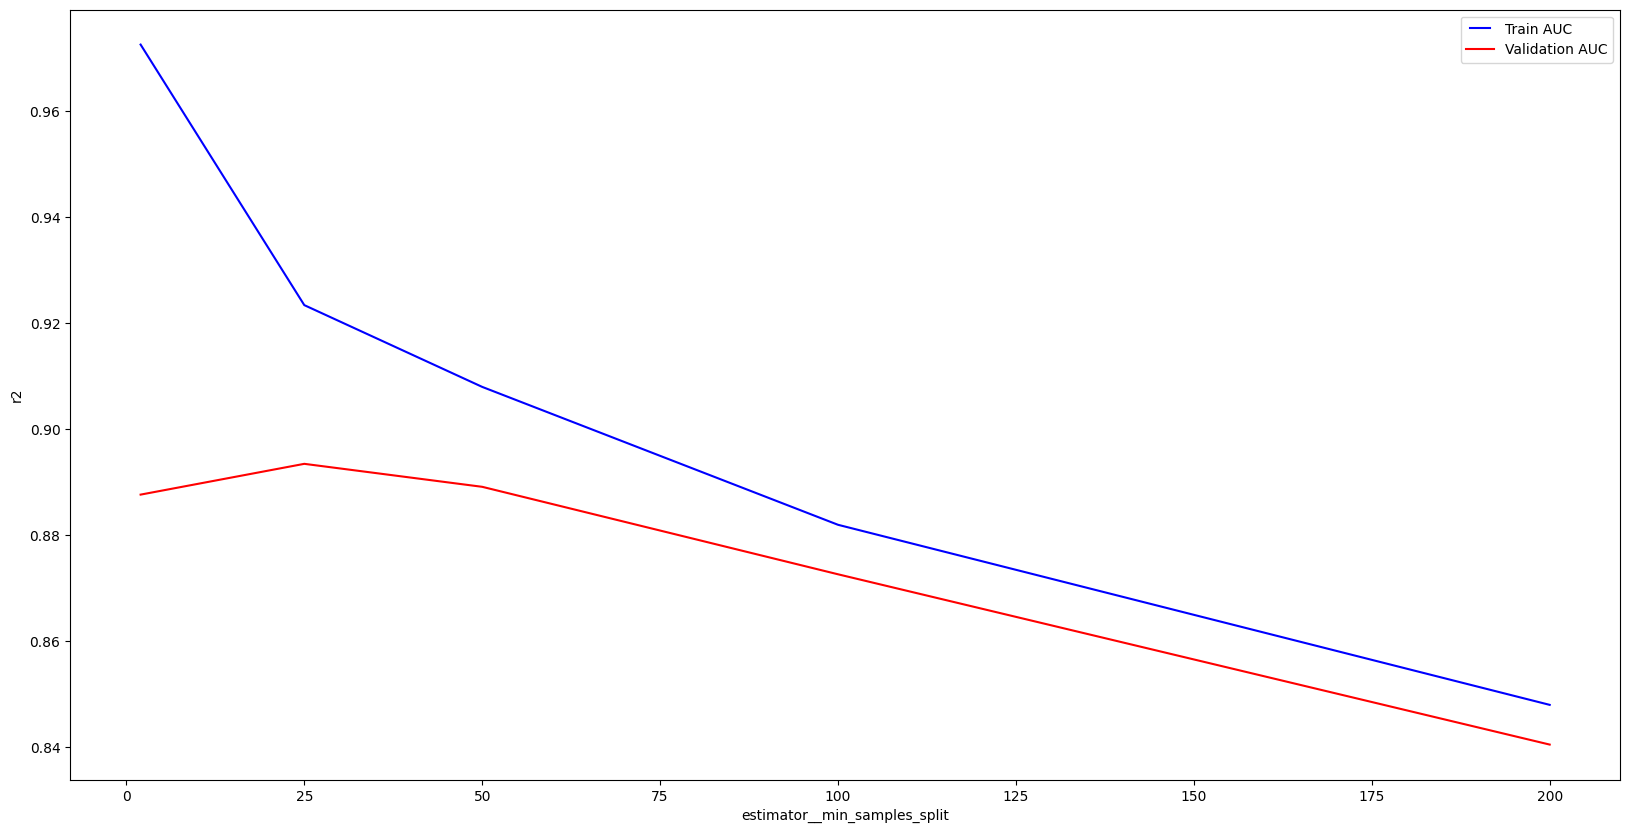

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
min_samples_split : 2 - Train Score : 0.9725297430057342 , Validation Score : 0.8875950787234105
min_samples_split : 25 - Train Score : 0.9233585744848904 , Validation Score : 0.8934051374541709
min_samples_split : 50 - Train Score : 0.9079257460710848 , Validation Score : 0.8890683264101918
min_samples_split : 100 - Train Score : 0.8819004062488347 , Validation Score : 0.8725581471665327
min_samples_split : 200 - Train Score : 0.84791596782078 , Validation Score : 0.8404203504440503


In [158]:
pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                     ('feature_scaler', StandardScaler()),
                     ('estimator', RandomForestRegressor(random_state=1, n_estimators=300))])

space = [2, 25, 50, 100, 200]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'RandomForest/', X_train, y_train, 
                                                        hyperparameter_name='estimator__min_samples_split', hyperparameter_space=space,
                                                        scoring='r2', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'min_samples_split : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of min_samples_split would be 2-30.

Entered function tuning_single_hyperparameter.


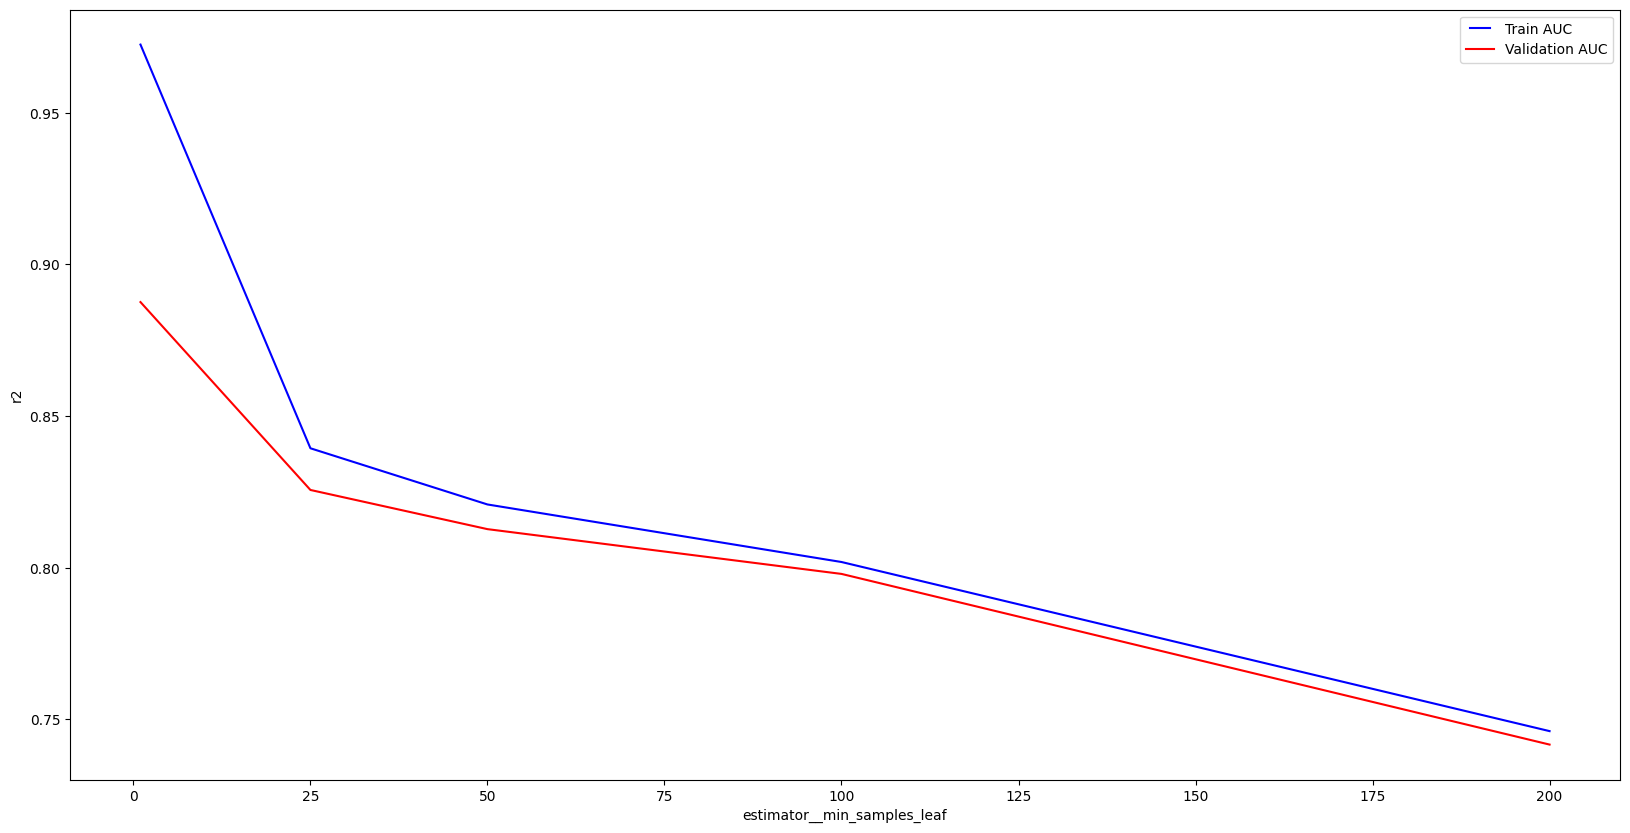

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
min_samples_leaf : 1 - Train Score : 0.9725297430057342 , Validation Score : 0.8875950787234105
min_samples_leaf : 25 - Train Score : 0.8393725961053168 , Validation Score : 0.8256217859601328
min_samples_leaf : 50 - Train Score : 0.8208390898650805 , Validation Score : 0.812698396552831
min_samples_leaf : 100 - Train Score : 0.8018574443277198 , Validation Score : 0.7979295440314278
min_samples_leaf : 200 - Train Score : 0.7460733040165779 , Validation Score : 0.7416339463580224


In [159]:
pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                     ('feature_scaler', StandardScaler()),
                     ('estimator', RandomForestRegressor(random_state=1, n_estimators=300))])

space = [1, 25, 50, 100, 200]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'RandomForest/', X_train, y_train, 
                                                        hyperparameter_name='estimator__min_samples_leaf', hyperparameter_space=space,
                                                        scoring='r2', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'min_samples_leaf : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of min_samples_leaf would be 1-30. 

### Find good hyperparameter space for KNN

Entered function tuning_single_hyperparameter.


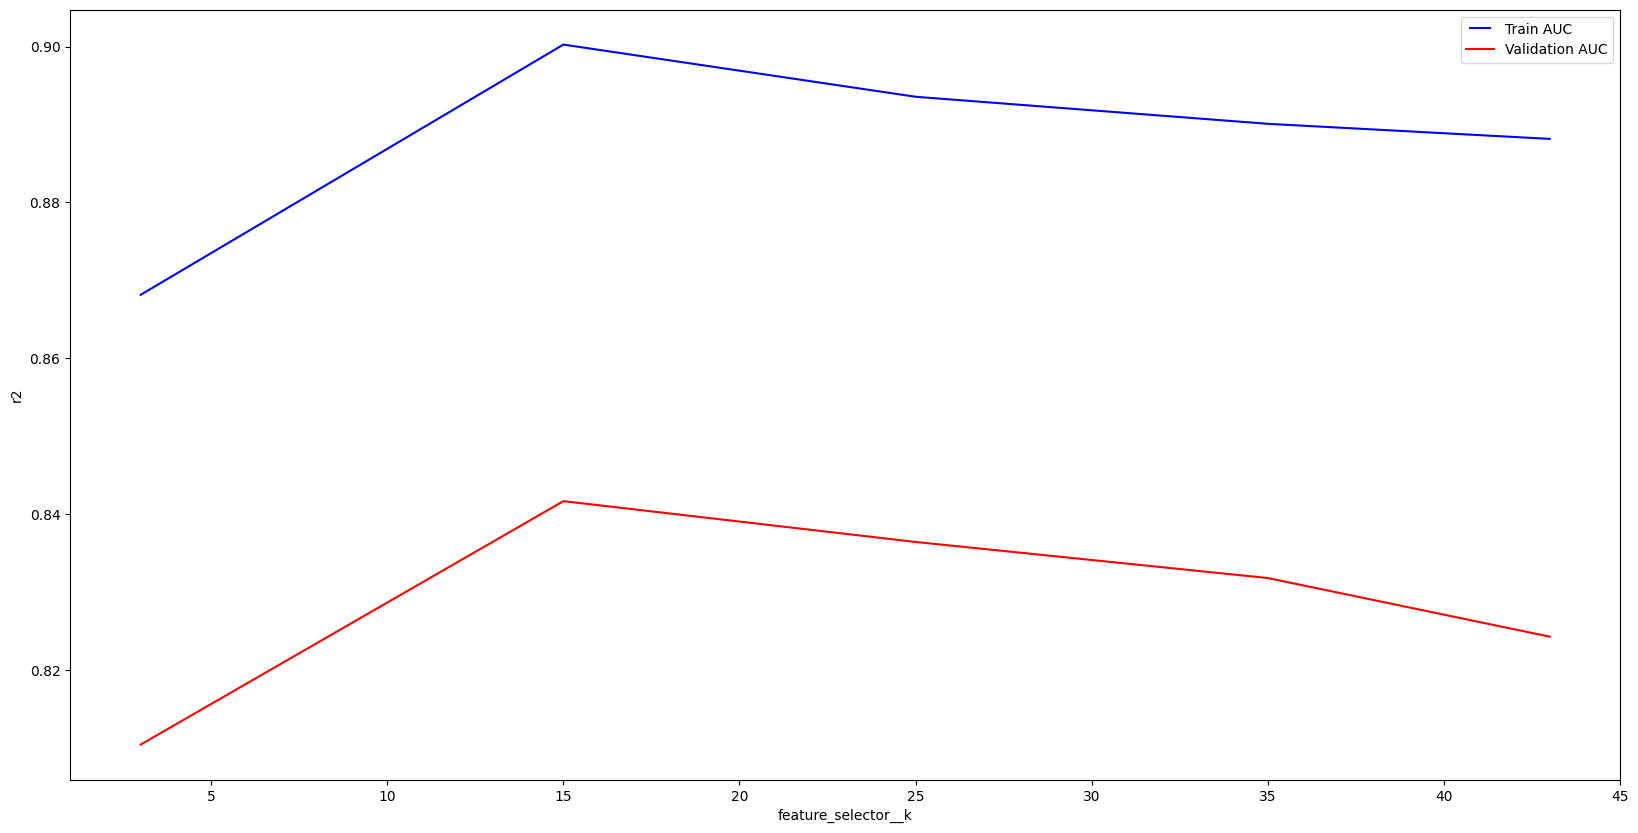

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Selected Features : 3 - Train Score : 0.8681479603552724 , Validation Score : 0.8104537447038496
Nr Selected Features : 15 - Train Score : 0.9002510239450026 , Validation Score : 0.841681924842747
Nr Selected Features : 25 - Train Score : 0.8935569869966915 , Validation Score : 0.8364465079971397
Nr Selected Features : 35 - Train Score : 0.8900869445604067 , Validation Score : 0.8318159514924129
Nr Selected Features : 43 - Train Score : 0.888154127066486 , Validation Score : 0.8242986851402858


In [160]:
pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                     ('feature_scaler', StandardScaler()),
                     ('estimator', KNeighborsRegressor())])

space = [3, 15, 25, 35, 43]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'KNN/', X_train, y_train, 
                                                        hyperparameter_name='feature_selector__k', hyperparameter_space=space,
                                                        scoring='r2', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Selected Features : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of nr selected features would be 15-40.

Entered function tuning_single_hyperparameter.


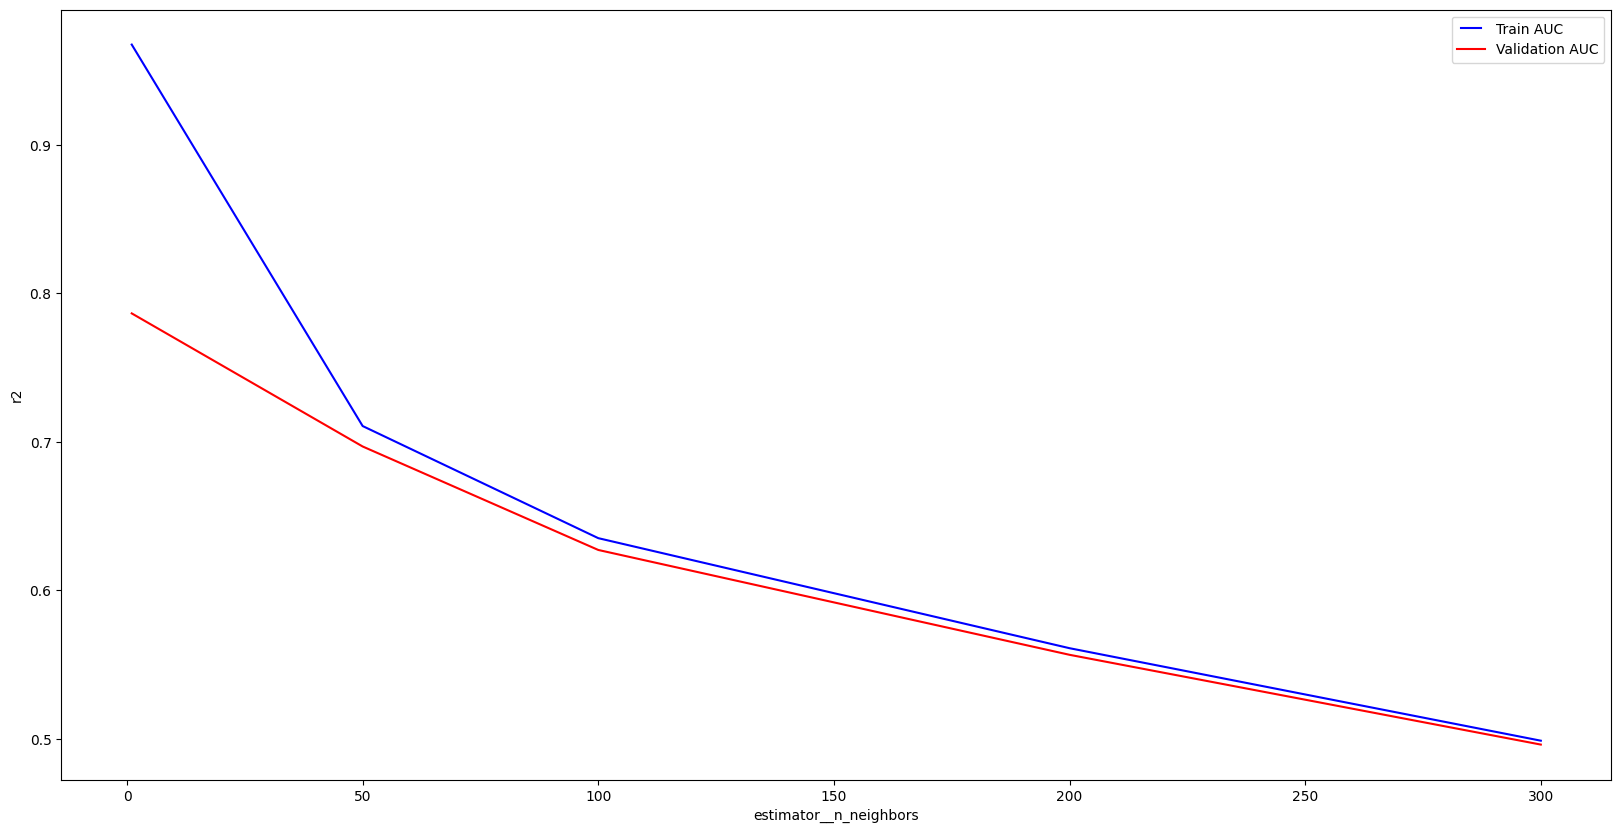

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Neighbors : 1 - Train Score : 0.9675832839215486 , Validation Score : 0.7865833441280161
Nr Neighbors : 50 - Train Score : 0.7107314042257069 , Validation Score : 0.696963160814859
Nr Neighbors : 100 - Train Score : 0.6352324961807767 , Validation Score : 0.6272875991934613
Nr Neighbors : 200 - Train Score : 0.5611387113417955 , Validation Score : 0.5566926285332273
Nr Neighbors : 300 - Train Score : 0.498859420756444 , Validation Score : 0.4962435390305238


In [161]:
pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                     ('feature_scaler', StandardScaler()),
                     ('estimator', KNeighborsRegressor())])

space = [1, 50, 100, 200, 300]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'KNN/', X_train, y_train, 
                                                        hyperparameter_name='estimator__n_neighbors', hyperparameter_space=space,
                                                        scoring='r2', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Neighbors : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of n_neighbors would be 1-60.

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import random

def best_model_OutOfManyModels_RandomizedSearchCV(X_train, y_train, X_test, y_test, cv_scoring, cv_kfold=5, 
                                                  cv_niter=20, verbose=False):
    try:
        print('Entered the function best_model_OutOfManyModels_RandomizedSearchCV.')
    
        # model_df is dataframe which containss information about training and testing of each model
        model_df = pd.DataFrame()
        
        # dic is a dictionary which contains the best model object found for each ML algorithms and its score
        dic = {}
        
    
        # Find Best Linear Regression model. With Linear Regression there is no need to perform hyperparameter tuning
        print('Linear Regression Tuning')
        
        linear_regression_pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                                               ('feature_scaler', StandardScaler()),
                                               ('estimator', LinearRegression())])
        
        linear_regression_params = {'feature_selector__k' : [30, 35, 40, 43]}

        linear_regression_infos = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, 
                                                                       model_name='LinearRegression',
                                          defaultModel=linear_regression_pipeline, params=linear_regression_params, 
                                          cv_scoring=cv_scoring, cv_kfold=cv_kfold, cv_n_iter=cv_niter)
        
       # model_df = model_df.append(linear_regression_infos, ignore_index=True)
        model_df = pd.concat([model_df, pd.DataFrame([linear_regression_infos])],ignore_index=True)
        # Get Best Linear Regression Model Object and its Test score
        best_linear_regression_object = linear_regression_infos['Final Best Model Object']
        best_linear_regression_test_score = linear_regression_infos['Final Best Test Score']
        # Add the information to the dictionary
        dic[best_linear_regression_object] = best_linear_regression_test_score
      
    
        # Find Best Random Forest Model
        randomforest_pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                                           ('feature_scaler', StandardScaler()),
                                           ('estimator', RandomForestRegressor(random_state=1, n_estimators=300))])
        
        randomforest_params = {'feature_selector__k' : [25, 30, 35, 40, 43],
                               'estimator__max_depth' : [3, 5, 7, 9, 12],
                               'estimator__max_features' : [None, 'sqrt', 'log2'],
                               'estimator__min_samples_split' : [2, 5, 10, 20, 30],
                               'estimator__min_samples_leaf' : [1, 5, 10, 20, 30],
                               'estimator__criterion' : ["mae", "mse"],
                               'estimator__bootstrap' : [True, False]}
        
        print('Random Forest Tuning')
        randomforest_infos = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='RandomForestRegressor',
                                                defaultModel=randomforest_pipeline, params=randomforest_params, 
                                              cv_scoring=cv_scoring, cv_kfold=cv_kfold, cv_n_iter=cv_niter)
        
        # Add the RandomForest Infos to the dataframe
         # model_df = model_df.append(linear_regression_infos, ignore_index=True)
        model_df = pd.concat([model_df, pd.DataFrame([randomforest_infos])],ignore_index=True)
        
        # Get Best RandomForest Model Object and its test score
        best_randomforest_object = randomforest_infos['Final Best Model Object']
        best_randomforest_test_score = randomforest_infos['Final Best Test Score']
        # Add the information to the dictionary
        dic[best_randomforest_object] = best_randomforest_test_score
        
        
        # Find Best KNN Model
        knn_pipeline = Pipeline([('feature_selector', SelectKBest(score_func=mutual_info_regression, k='all')),
                                 ('feature_scaler' , StandardScaler()),
                                 ('estimator', KNeighborsRegressor())])
        
        knn_params = {'feature_selector__k' : [15, 25, 30, 40],
                      'estimator__n_neighbors' : [5, 10, 20, 35, 45, 60],
                      'estimator__weights' : ['uniform', 'distance']}
        
        print('KNN Tuning')
        knn_infos = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='KNeighborsRegressor',
                                      defaultModel=knn_pipeline, params=knn_params, 
                                      cv_scoring=cv_scoring, cv_kfold=cv_kfold, cv_n_iter=cv_niter)
        
        # Add the knn infos to the dataframe
       # model_df = model_df.append(knn_infos, ignore_index=True)
        model_df = pd.concat([model_df, pd.DataFrame([knn_infos])],ignore_index=True)
        # Get Best KNN Model Object and its test score
        best_knn_object = knn_infos['Final Best Model Object']
        best_knn_test_score = knn_infos['Final Best Test Score']
        # Add the information to the dictionary
        dic[best_knn_object] = best_knn_test_score
        

        # save information about all models into a csv file and the information about xgboost in separate file if we have used early stopping
        model_df.to_csv('model_infos.csv', index=False)
    
    
       # Finding best model out of all models based on test score
        best_model_object = max(dic, key=dic.get)
        best_test_score = max(dic.values())
        print(f'Best Model Object : {best_model_object} . Best Test Score : {best_test_score}')


        try:

            print('Function best_model_OutOfManyModels_RandomizedSearchCV Completed Successfully. Exited this function.')
            return best_model_object, str(best_model_object.named_steps['estimator']).split('(')[0]

        except Exception as e:
            return best_model_object, str(best_model_object).split('(')[0]
        
        
    
    except Exception as e:
        print('Error occured in function best_model_OutOfManyModels_RandomizedSearchCV. Error Message : ' + str(e))